<a href="https://colab.research.google.com/github/Ragnarvd/Automatic_text_alignment/blob/main/Scriptie_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A tutorial to make you own parallel corpus

### First some general information
This is a Google Colab tutorial, where you will make your own parallel corpus. The code cells are represented in black if you are in dark mode or grey if you are in light mode, and the output from each cell will be displayed directly underneath. 




In [ ]:
# Example code cell

To run a code cell move your cursor, simply click on the "Run" button ▶ located in the upper left part of the cell. You will know the cell has been executed successfully if you see a small green check ✅ mark next to the cell. The output from the cell will be displayed under the cell. Once you have run a cell, move on to the next one. Repeat the process until you have completed all the code cells in the tutorial. 


##  Read all the text carefully

*   As a general rule, you can run all the code cells without making any changes, unless instructed otherwise.

* Most code cells are accompanied by accompanying text, which serves as an explanation for the code and aids in comprehending the actions being performed.



*   For faster computations and to save time, it is recommended to use a GPU as a hardware accelerator.


*   To do this, go to "Runtime" in the menu bar then select "Change runtime type". In the pop-up window, select "GPU" as the hardware accelerator, then click "Save".


*   You can also use a normal CPU, but using a GPU will significantly speed up the computations. So it is a lot faster

* All the green text with a # in front of it are comments in the code cells, its only extra information 

* If the notebook gets stuck or something is not working anymore while it was working before, like all algorithms resetting often works. To do this go tho "Runtime" and select "disconnect and delete runtime". 








# If you do everything corretly your parallel book will look somewhat like this

 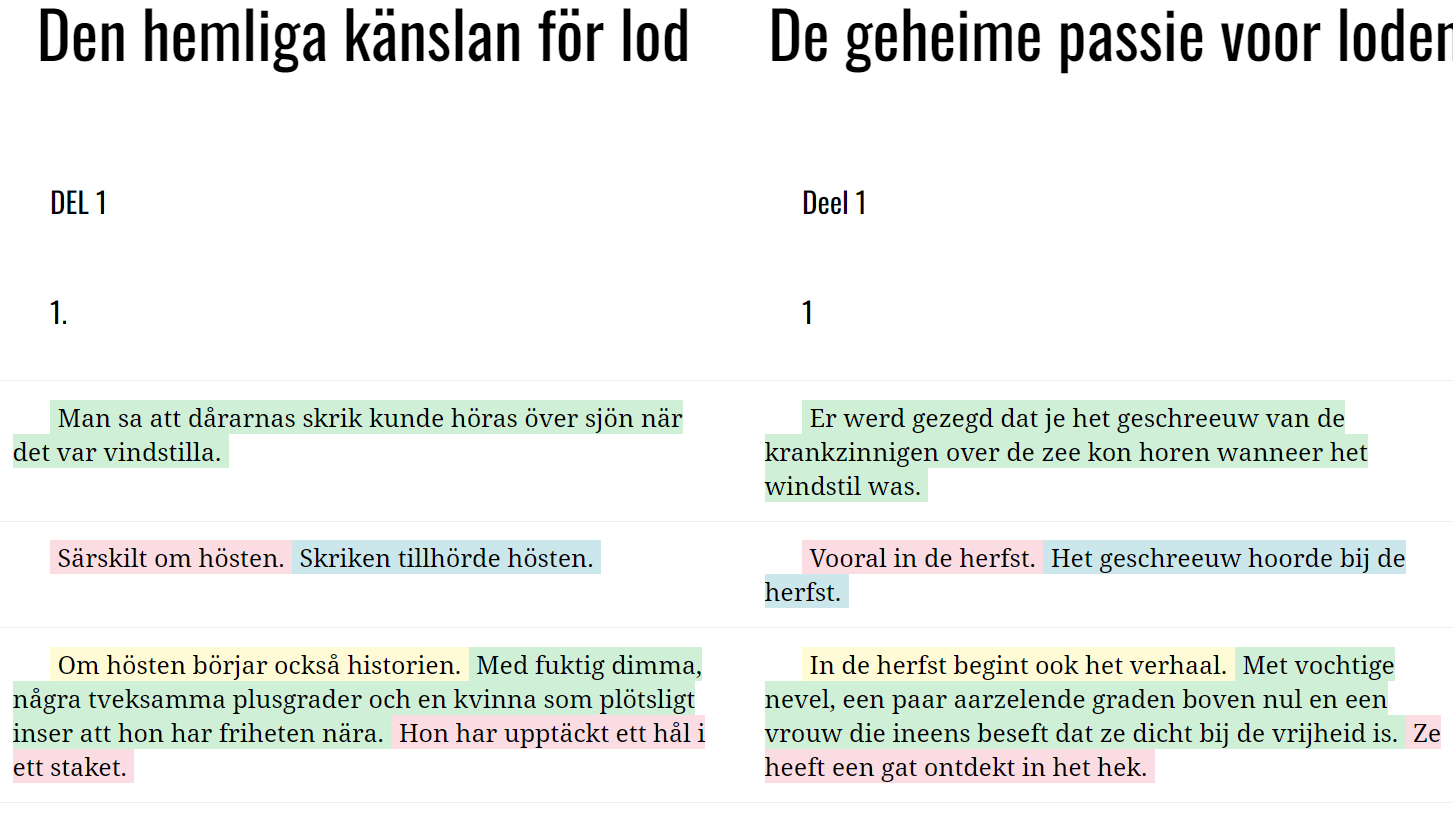

### Installing and Loading Required Packages

- Before we can start working with the code cells, we need to install all necessary packages and load them into our Google Colab environment.

- Make sure to run these cells to ensure that you have all the required packages and libraries loaded before moving on to the next steps of the tutorial.

- For installing and loading all required packages run the next three code cells.

In [ ]:
# Import all the necessary  software 
! git clone https://github.com/Ragnarvd/lingtrain-aligner
%cd lingtrain-aligner/src

Cloning into 'lingtrain-aligner'...
remote: Enumerating objects: 851, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 851 (delta 123), reused 240 (delta 111), pack-reused 591
Receiving objects: 100% (851/851), 2.36 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (480/480), done.
/content/lingtrain-aligner/src


In [ ]:
# Import the ibraries that are not normally installed in google colab
!pip install pycld3
!pip install razdel dateparser sentence_transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 52.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 820.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=f7cadf5016d954cee7cb9e519df56d8db090dee2b34e5ecbecc3df0f3a7f243e
  Stored in direct

In [ ]:
# import the packages into our google colab environment

import os
import cld3

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper, evaluation

### Upload your files

Select your desired source and target text files for your parallel corpus, which can be in the form of books, newspapers, or magazines as long as they are saved in .txt format. To upload one or more files, run the code cell, click on the "Choose File" button that appears, navigate to the folder where the files are stored and select your files that you need for your parallel corpus. Note that the uploading process may take several minutes, depending on the size of the files.

In [ ]:
# upload your .txt files
from google.colab import files
uploaded = files.upload()

Saving C_CvB_Mankell_Kinesen_2008_2008.txt to C_CvB_Mankell_Kinesen_2008_2008.txt
Saving C_Mankell_Kinesen_2008.txt to C_Mankell_Kinesen_2008.txt
Saving L_CL_Mankell_Djup_2004_2006.txt to L_CL_Mankell_Djup_2004_2006.txt
Saving L_Mankell_Djup_2004.txt to L_Mankell_Djup_2004.txt
Saving NF_CV_Mankell_ Kvicksand 2014_2015.txt to NF_CV_Mankell_ Kvicksand 2014_2015.txt
Saving NF_Mankell_Kvicksand_2014.txt to NF_Mankell_Kvicksand_2014.txt


### Choose your source and target language



In this part you have to choose the languages for your source and target text,
for a list of all the supported languages run the following code cell. 

In [ ]:
d = splitter.get_supported_languages()
print(d.values())

for i in d.values():
  print(i)

dict_values([{'name': 'Russian'}, {'name': 'Belarusian'}, {'name': 'Chinese'}, {'name': 'German'}, {'name': 'English'}, {'name': 'French'}, {'name': 'Italian'}, {'name': 'Turkish'}, {'name': 'Spanish'}, {'name': 'Polish'}, {'name': 'Portugal'}, {'name': 'Hungarian'}, {'name': 'Czech'}, {'name': 'Japanese'}, {'name': 'Bashkir'}, {'name': 'Korean'}, {'name': 'Sweden'}, {'name': 'Dutch'}, {'name': 'Ukrainian'}, {'name': 'Chuvash'}, {'name': 'Unknown'}])
{'name': 'Russian'}
{'name': 'Belarusian'}
{'name': 'Chinese'}
{'name': 'German'}
{'name': 'English'}
{'name': 'French'}
{'name': 'Italian'}
{'name': 'Turkish'}
{'name': 'Spanish'}
{'name': 'Polish'}
{'name': 'Portugal'}
{'name': 'Hungarian'}
{'name': 'Czech'}
{'name': 'Japanese'}
{'name': 'Bashkir'}
{'name': 'Korean'}
{'name': 'Sweden'}
{'name': 'Dutch'}
{'name': 'Ukrainian'}
{'name': 'Chuvash'}
{'name': 'Unknown'}


You can see a list with all the supported languages and the language code,
for example: 

```
# 'en': {'name': 'English'}, 
```
This means that en is the language code for English, in the code cell below you have to choose the language code for you source and for you target file. The default language codes are Swedish and Dutch but you can change this.


# ❗You have to edit the code cell below ❗

---



## *   Replace s = "sw" with s = "desired language code" to choose your source language 
## *   Replace t = "nl" with t = "desired language code" to choose your target language 



In [ ]:
## TODO ## CHOOSE YOUR SOURCE AND TARGET LANGUAGE
s = "sw"
t = "nl"

##❗You dont have to edit the rest of the code cells

Here the code examines all uploaded .txt files and selects only those that match the chosen source and target languages. The files are then sorted and stored in a list. The output should be you 2 lists with your .txt files, each list with the files from 1 language

In [ ]:
if s == "sw":
  s = "sv"
else:
  s = s

source = []
target = []

# Only select the text files with the desired language
for file in os.listdir():
    if file.endswith(".txt"):
        with open(file, 'r') as f:
            text = f.read()
            language = cld3.get_language(text)
            if language.language == s:
                source.append(file)
            if language.language == t:
              target.append(file)



# List all txt files in the directory
path = '/content/lingtrain-aligner/src/'

# Get the size of each file and store it in a list
file_sizes_s = [(f, os.path.getsize(os.path.join(path, f))) for f in source]
file_sizes_t = [(f, os.path.getsize(os.path.join(path, f))) for f in target]

# Sort the files by size
sorted_files_s = sorted(file_sizes_s, key=lambda x: x[1])
sorted_files_t = sorted(file_sizes_t, key=lambda x: x[1])

# Print the sorted list of files
for i in range(len(source)):
  source[i] = sorted_files_s[i][0]
for i in range(len(target)):
  target[i] = sorted_files_t[i][0]

print(source)
print(target)

['L_Mankell_Djup_2004.txt', 'NF_Mankell_Kvicksand_2014.txt', 'C_Mankell_Kinesen_2008.txt']
['L_CL_Mankell_Djup_2004_2006.txt', 'NF_CV_Mankell_ Kvicksand 2014_2015.txt', 'C_CvB_Mankell_Kinesen_2008_2008.txt']


Here we read our files and do the first preprocessing, we split the text in sentences and store it all in a list. If you are making a parallel corpus from 2 or more files the files from the same language are add together. The output should be a small preview of the first 10 sentences in your parallel corpus

In [ ]:
# Define the list of source text file paths
source_long = []
target_long = []
for i in range(len(source)):
  path_s = "/content/lingtrain-aligner/src/{}" .format(source[i])
  path_t = "/content/lingtrain-aligner/src/{}" .format(target[i])
  source_long.append(path_s)
  target_long.append(path_t)
# print(source_long)

# Read the text from each file and store it in a list
sourcetxt_l = []
for i in range(len(source)):
    with open(source[i], 'r') as f:
        # Read the file
        txt = f.read()
        sourcetxt_l.append(txt)

targettxt_l = []
for i in range(len(target)):
    with open(target[i], 'r') as f:
        # Read the file
        txt = f.read()
        targettxt_l.append(txt)

# Concatenate the text from each file into one string
long_txt_s = '\n'.join(sourcetxt_l)
long_txt_t = '\n'.join(targettxt_l)

# Write the concatenated text to a new file
with open('sourcetext.txt', 'w') as f:
    f.write(long_txt_s)

with open('targettext.txt', 'w') as f:
    f.write(long_txt_t)


with open('sourcetext.txt', 'r') as f:
    # read the file
    sourcetxt = f.read()

sourcetxt = sourcetxt.split("\n")
print("First 10 sentences of your source text:")
for x in sourcetxt[:10]:
  print(x)

with open('targettext.txt', 'r') as f:
    # read the file
    targettxt = f.read()

targettxt = targettxt.split("\n")
print("First 10 sentences of your target text:")
for x in targettxt[:10]:
  print(x)

First 10 sentences of your source text:
DEL 1%%%%%h1. 

Den hemliga känslan för lod




1.

Man sa att dårarnas skrik kunde höras över sjön när det var vindstilla.
First 10 sentences of your target text:

Deel 1%%%%%h1. 

De geheime passie voor loden


1

Er werd gezegd dat je het geschreeuw van de krankzinnigen over de zee kon horen wanneer het windstil was.



If you want to make alignment of one specific book this is the cell to use, otherwise you can skip this cell. You have to write the name of your file in the 

```
# with open('', 'r') as f:
```
for example 

```
# with open('L_Mankell_Djup_2004.txt', 'r') as f: as source
# with open('L_CL_Mankell_Djup_2004_2006.txt', 'r') as f: as target
```




I saved this code part as a comment so it gives no errors while running the other parts od the notebook. If you want to use this code select all and pres crtl + ?

In [ ]:
# with open('NAME_OF_YOUR_SOURCE_FILE.txt', 'r') as f:
#   # read the file
#   sourcetxt = f.read()

# sourcetxt = sourcetxt.split("\n")
# # print("First 10 sentences:")
# # for x in sourcetxt[:10]:
# #   print(x)

# with open('NAME_OF_YOUR_TARGET_FILE.txt', 'r') as f:
#   # read the file
#   targettxt = f.read()
# targettxt = targettxt.split("\n")
# # print("First 10 sentences:")
# # for x in targettxt[:10]:
# #   print(x)

Here we define the path to the SQLite database (this is a repository with all the information necessary for alignment) and we chose what model to use. For further information about the models you can read (link), but what is important to know is that the LaBSE model (sentence_transformer_multilingual_labse) is a bigger sentence transformer model. It supports more languages and most of the times results in better alignments but it comes at a bigger computing cost. This is the default. If you want to use the smaller language model, which is less accurate but faster you have to change:

```
# model_name = models[1] --> model_name = model[0[
```



In [ ]:
db_path = "book.db"

lang_from = s
lang_to = t

models = ["sentence_transformer_multilingual", "sentence_transformer_multilingual_labse"]
model_name = models[1]

Herw mark the paragraphs, they will come in handy later because we align in small paragraphs.

In [ ]:
source_prepared = preprocessor.mark_paragraphs(sourcetxt)
target_prepared = preprocessor.mark_paragraphs(targettxt)

Let's have a preview and a check how the data looks, this are the first 10 sentences of each text

In [ ]:
for x in source_prepared[0:10]:
  print (x)
  
print("--------------\n")

for x in target_prepared[0:10]:
  print (x)

DEL 1%%%%%h1%%%%%.

Den hemliga känslan för lod




1%%%%%.

Man sa att dårarnas skrik kunde höras över sjön när det var vindstilla%%%%%.
--------------


Deel 1%%%%%h1%%%%%.

De geheime passie voor loden


1

Er werd gezegd dat je het geschreeuw van de krankzinnigen over de zee kon horen wanneer het windstil was%%%%%.



Here we divide everything into sentences, because it will be alignent at sentence level, than we will fill the database with the senteces and start aligning them

In [ ]:
splitted_from = splitter.split_by_sentences_wrapper(source_prepared, lang_from)
splitted_to = splitter.split_by_sentences_wrapper(target_prepared, lang_to)

Let's create our database and fill it with data taken from our markup. The database stores lines with the coordinates of paragraphs and chapters, metadata, mapping aligned lines to their original composition and location.


In [ ]:
if os.path.isfile(db_path):
    os.unlink(db_path)
    
aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)



Here we print some generall information from our database

In [ ]:
print("Language from: {}" .format(lang_from), "Language to: {}" .format(lang_to))
print("Sentences to align: {}" .format(len(splitted_from)))

Language from: sv Language to: nl
Sentences to align: 29368


Now we can align the documents. The alignment process goes in chunks with size  batch_size , around each chunk an additional number of rows of size  window is taken to ensure that the necessary rows are captured. The model takes a given number of lines of the first text and selects the best matches in the corresponding fragment of the second text using vector representations. This is the basis for the initial alignment. 

- You have the option to modify the batch size, which is set to 400 by default and is typically a reasonable value. This means that a plot is generated every 400 sentences. If you're working with a large corpus, this may result in a large number of plots, in which case you may wish to increase the batch size. If you have a small corpus you can set the batch size to the number of sentences to align, dont make the batch size bigger than 1000 this gives unclear graphs. 

```
# batch_size = your desired batch size
```
- The window refers to the overlap between batches and is used in case the correct alignment is found in a different batch. A commonly used value for the window is 20, but it can be altered as desired.

- The "embed_batch_size" determines the number of source and target sentences that will be processed by the sentence embedding algorithm at once. While it can be altered, it is not recommended to do so. A large number results in longer computation time while a small number decreases accuracy in alignment.

In [ ]:
batch_ids = list(range(0,300))

aligner.align_db(db_path, \
                model_name, \
                batch_size=500, \
                window=40, \
                batch_ids=batch_ids, \
                save_pic=False,
                embed_batch_size=10, \
                normalize_embeddings=True, \
                show_progress_bar=True
                )

batch: 0
Loading LaBSE model from Internet.


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/53 [00:00<?, ?it/s]

batch: 1


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 2


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 3


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 4


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 5


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 6


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 7


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 8


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 9


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 10


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 11


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 12


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 13


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 14


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 15


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 16


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 17


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 18


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 19


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 20


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 21


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 22


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 23


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 24


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 25


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 26


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 27


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 28


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 29


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 30


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 31


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 32


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 33


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 34


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 35


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 36


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 37


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 38


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 39


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 40


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 41


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 42


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 43


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 44


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 45


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 46


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 47


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 48


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 49


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 50


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 51


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 52


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 53


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 54


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 55


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 56


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 57


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/57 [00:00<?, ?it/s]

batch: 58


Batches:   0%|          | 0/36 [00:00<?, ?it/s]

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Here we visualize our alignment and you can see what the algorithm did. This is possible due to the fact that in the database we store the original line numbers for the aligned corpus.

- It is recommended to set the batch_size to the same batch_size as used for the alignment.

- size refers to the size of the output graph, you can make this bigger or smaller if you like.

- The "plt_show" setting determines whether the alignment will be displayed as a plot or not, with the default value being set to True. If you do not want plots to be displayed, change this to:

```
# plt_show = False
```



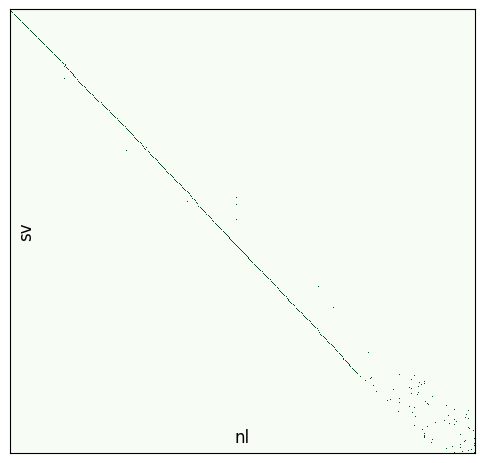

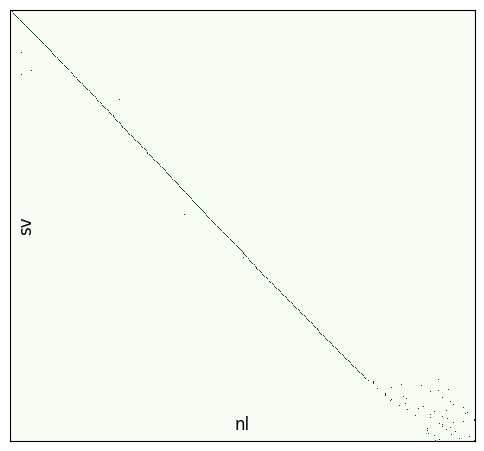

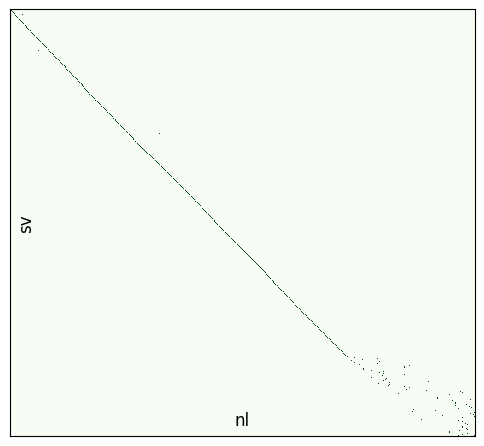

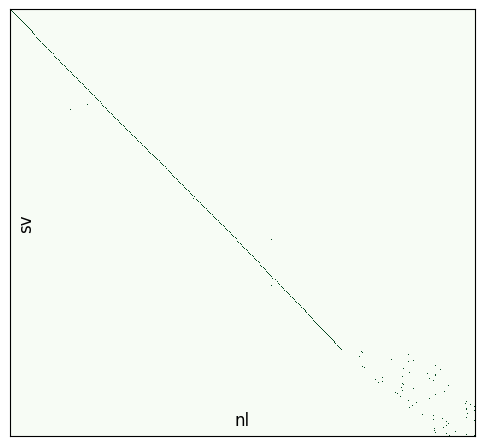

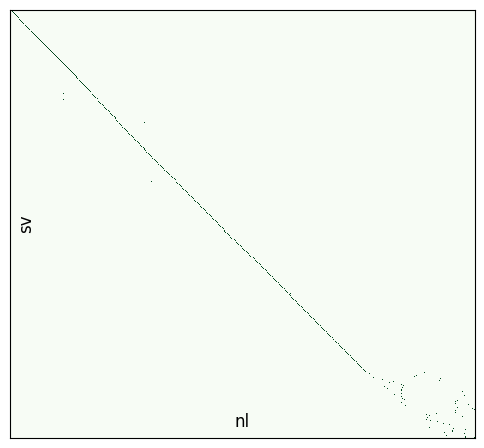

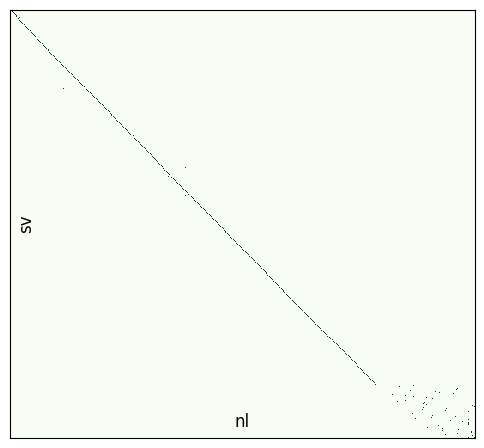

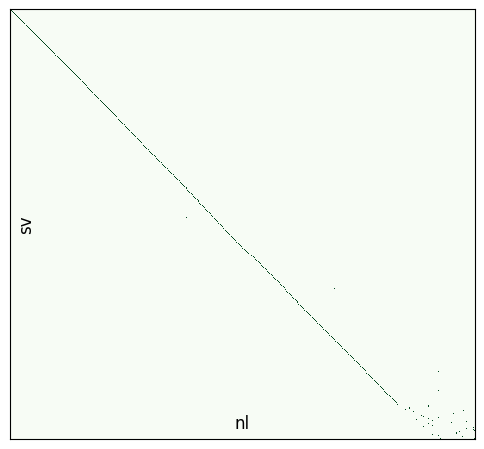

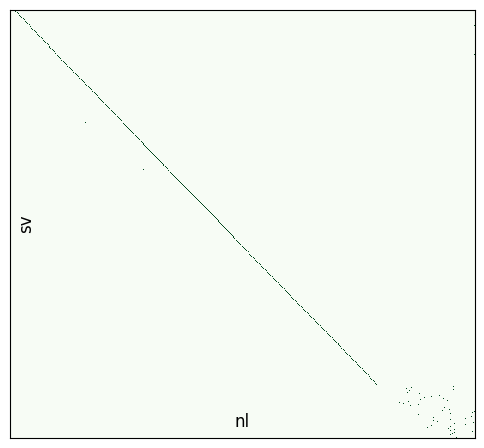

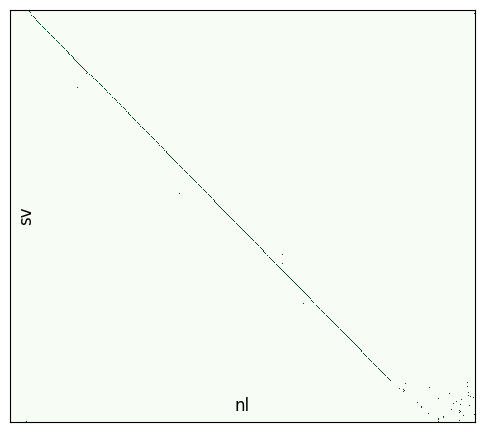

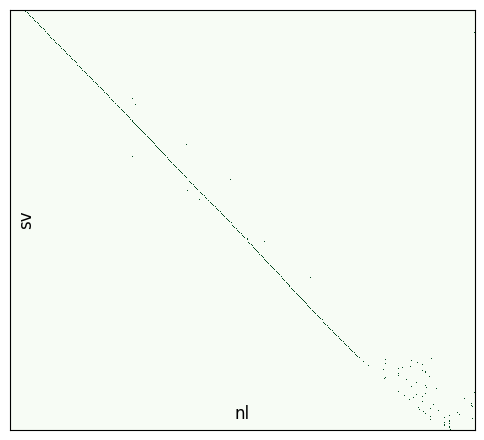

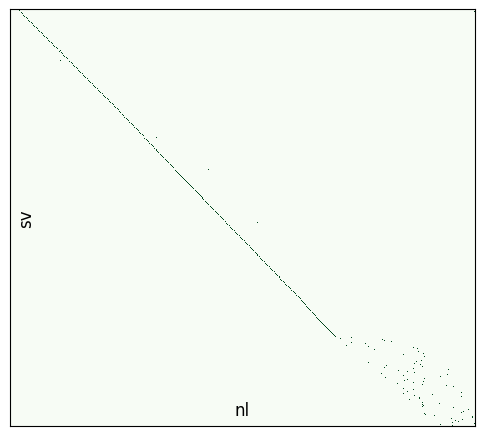

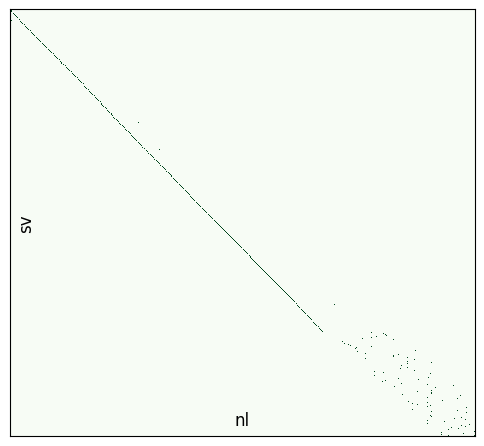

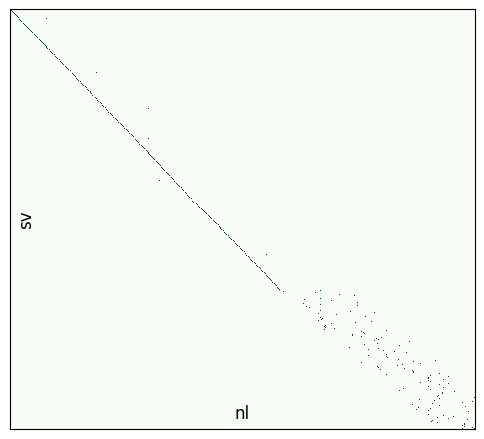

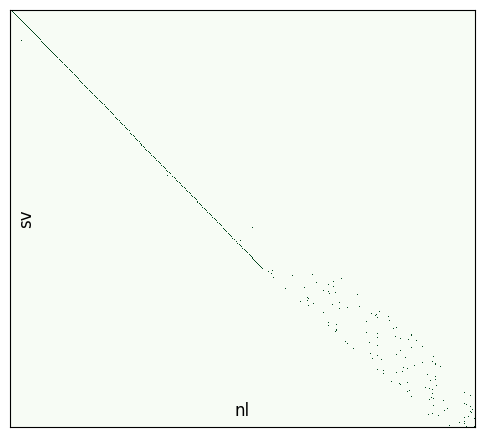

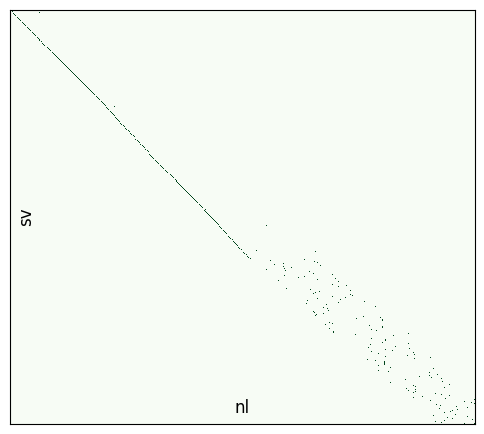

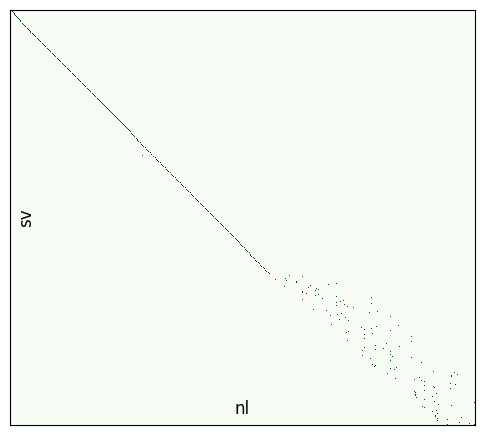

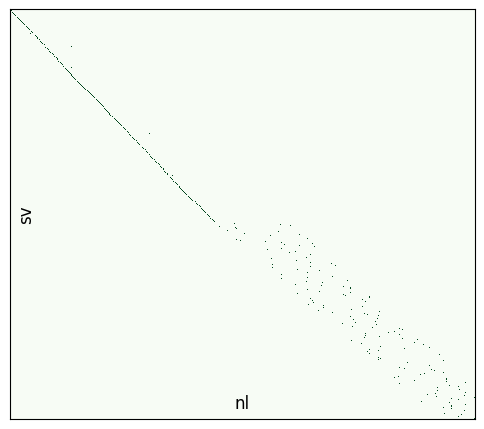

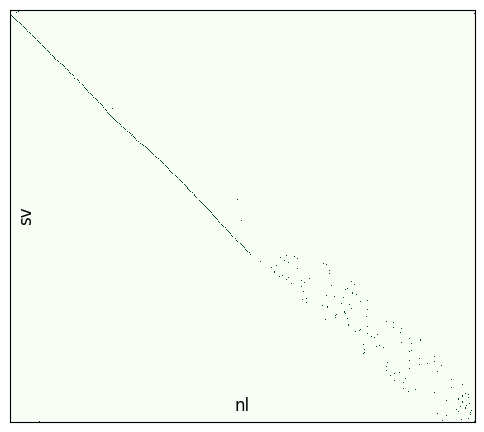

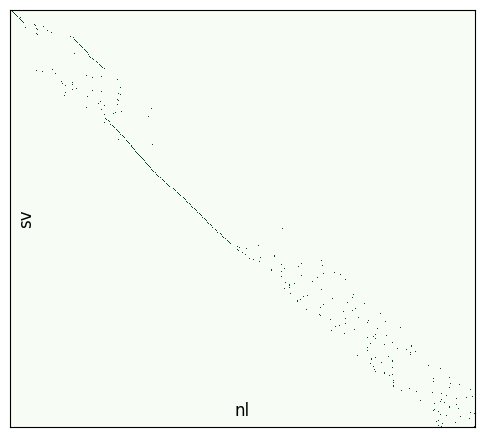

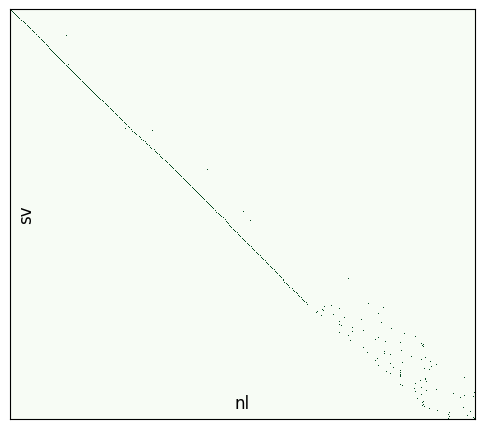

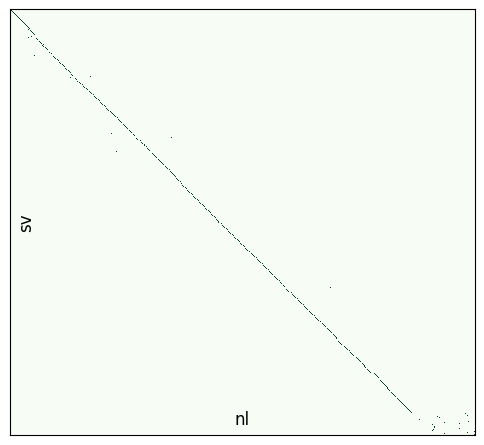

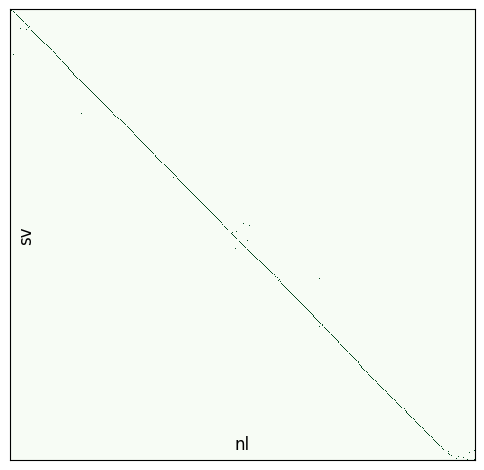

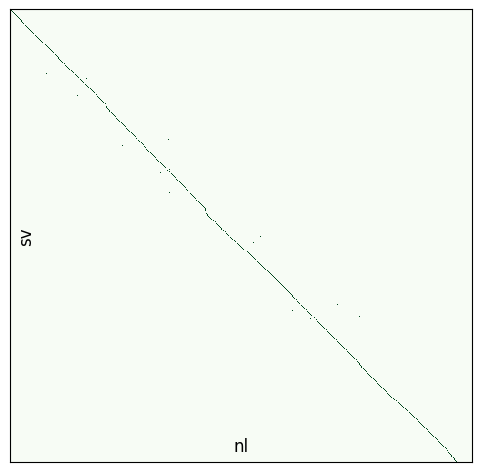

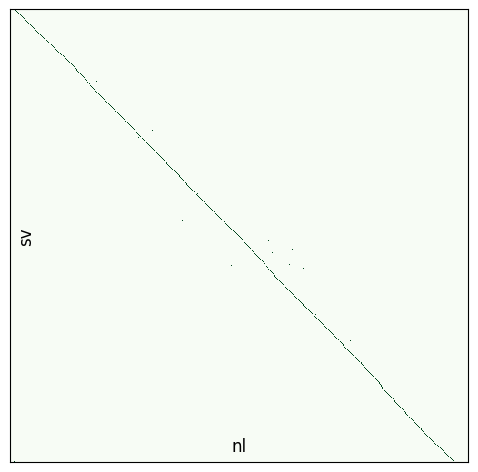

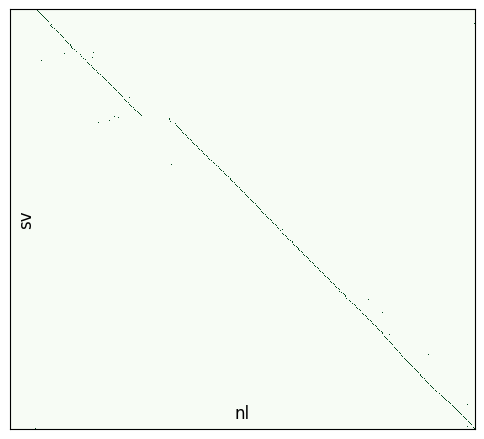

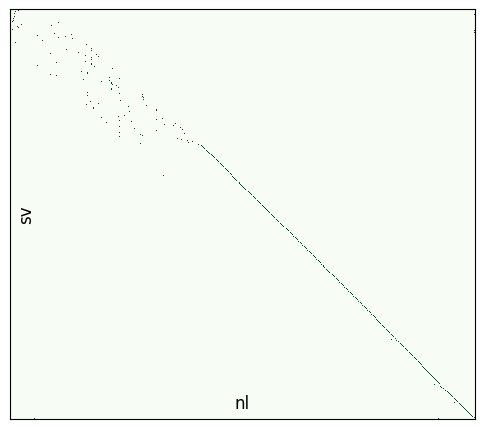

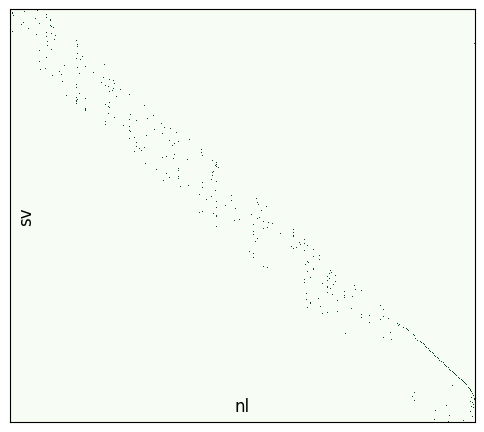

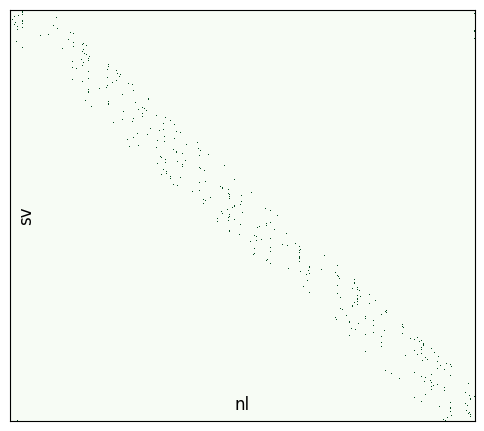

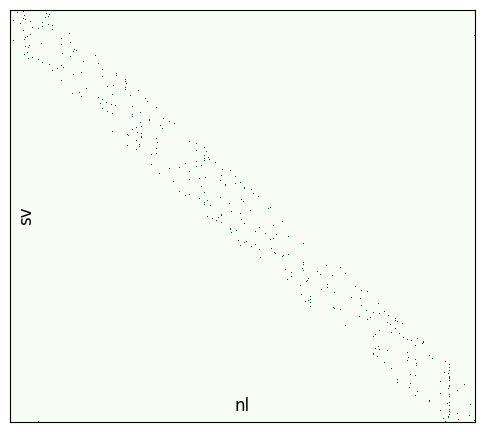

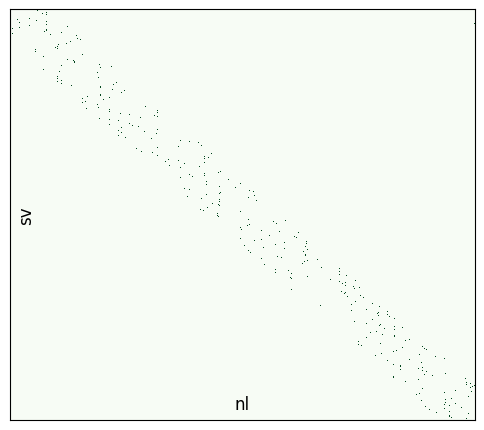

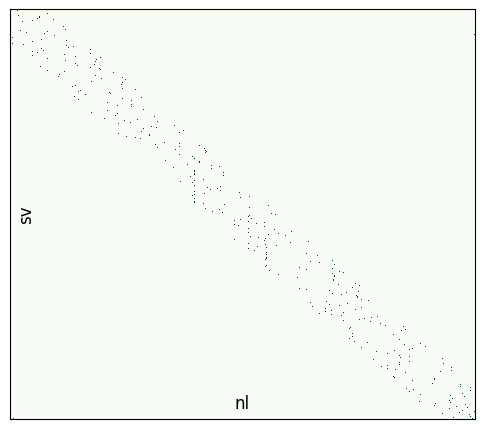

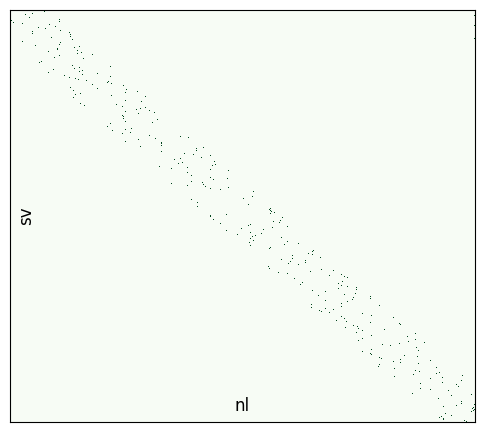

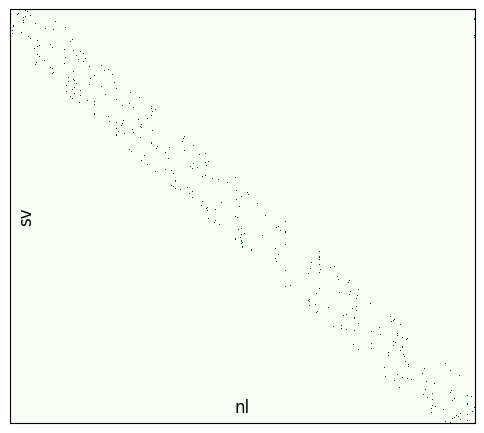

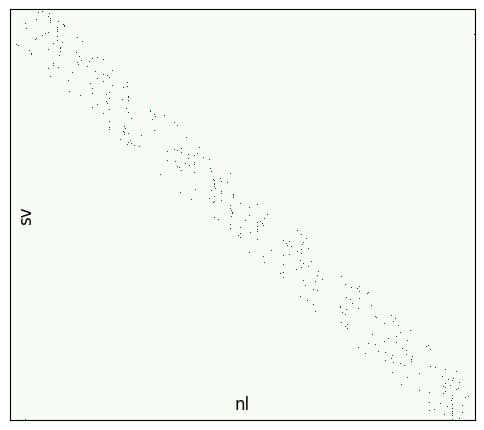

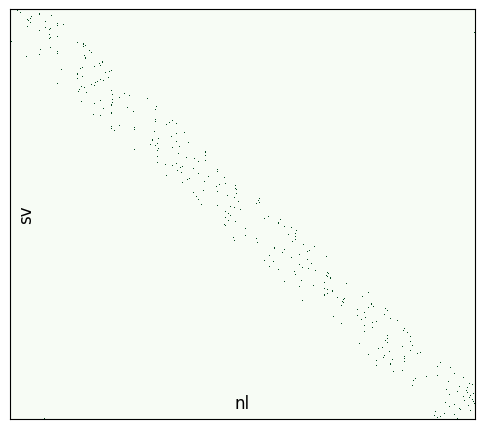

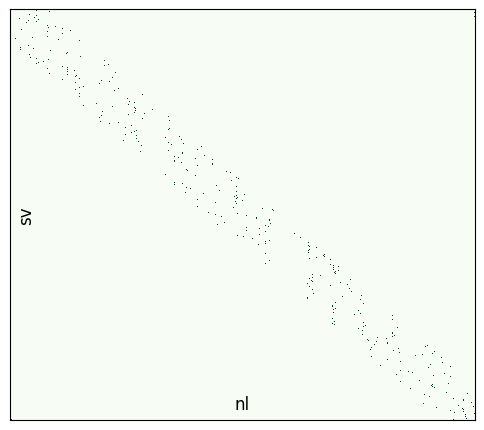

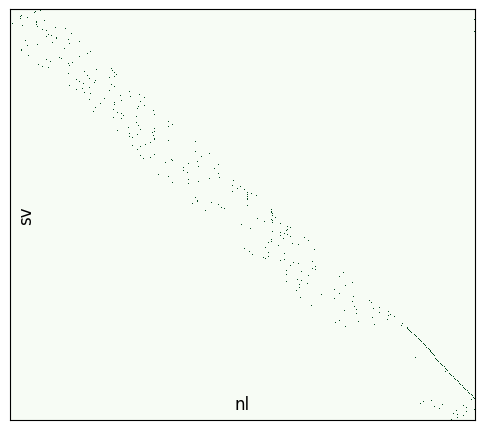

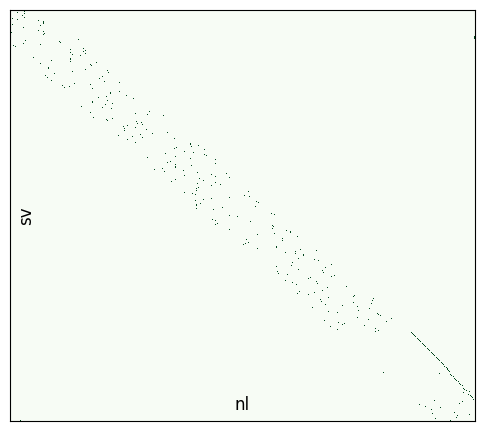

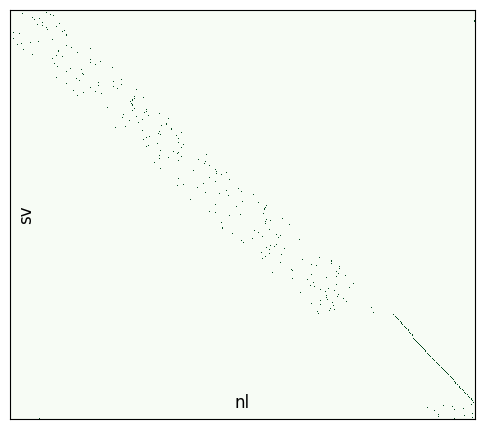

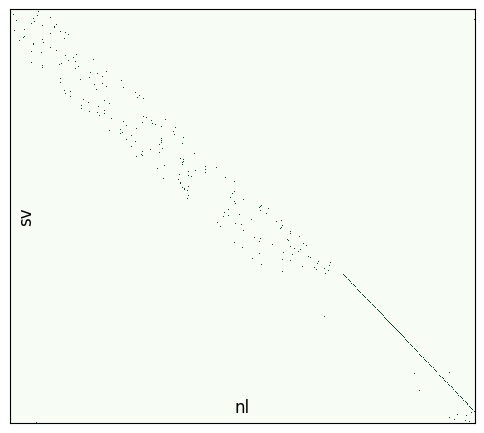

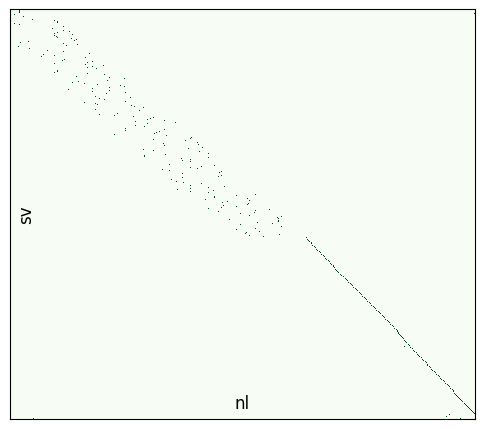

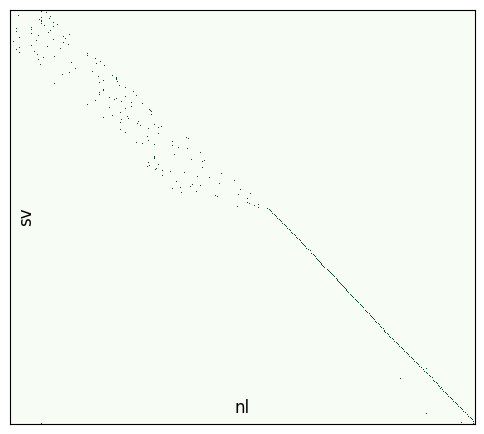

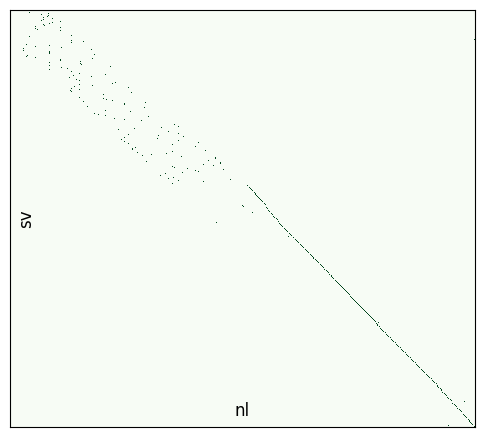

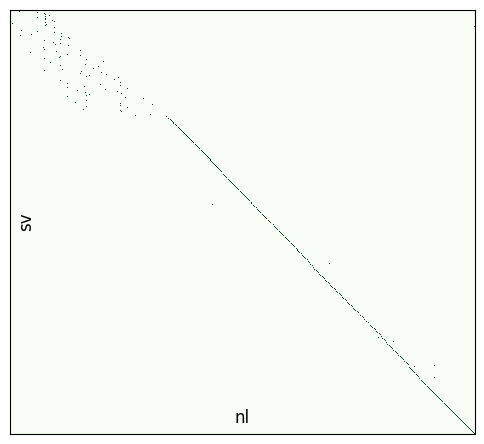

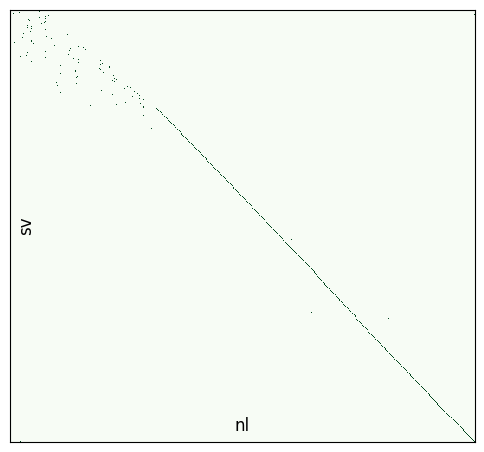

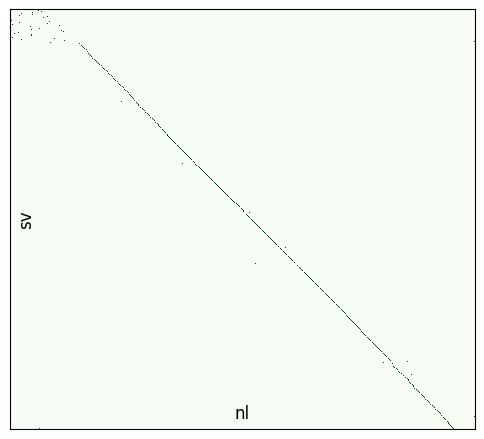

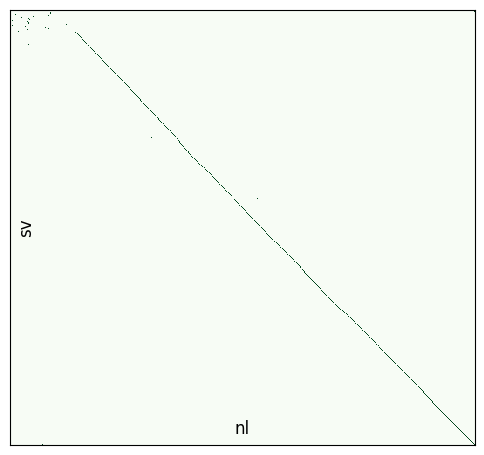

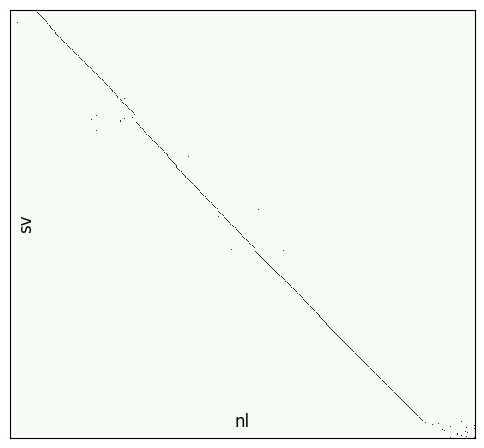

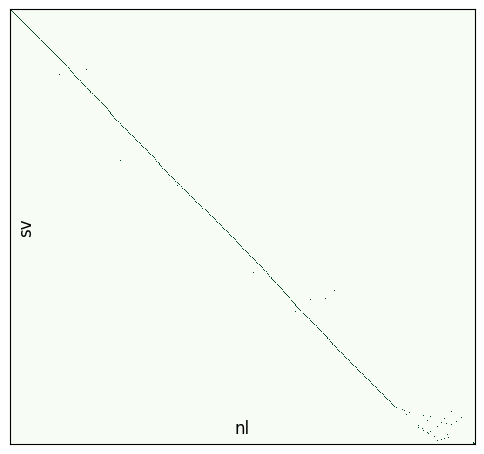

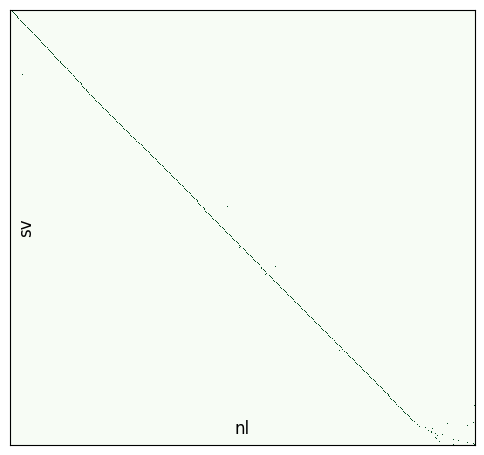

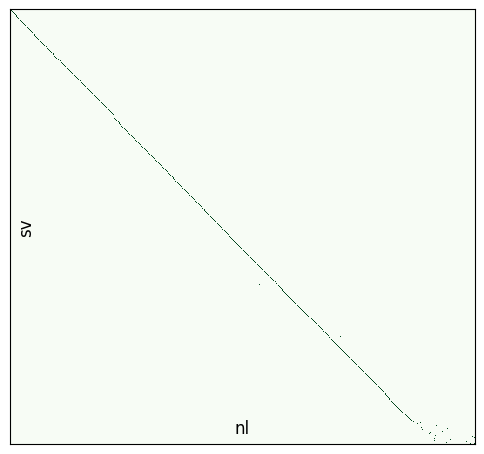

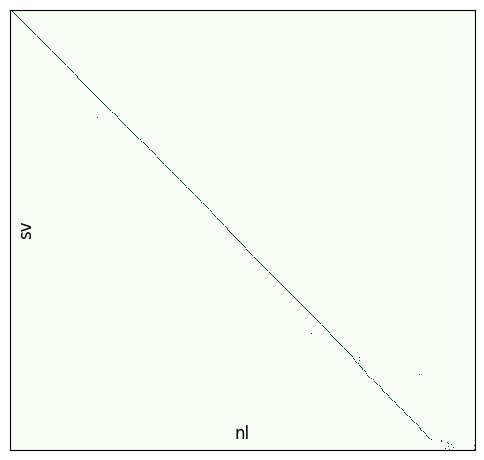

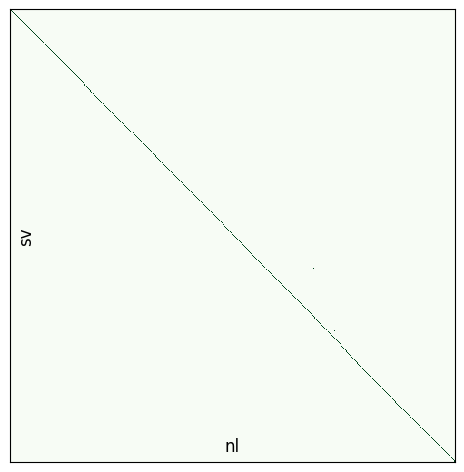

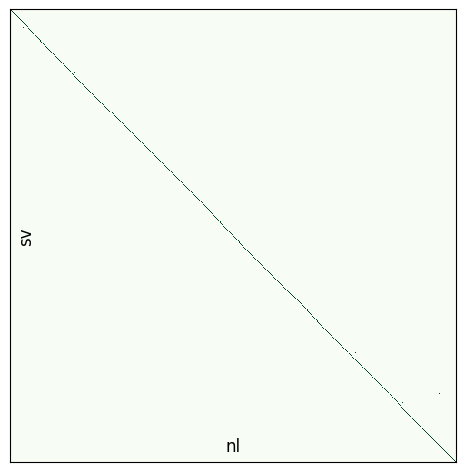

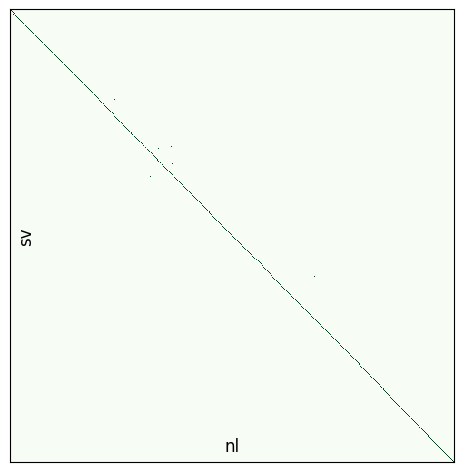

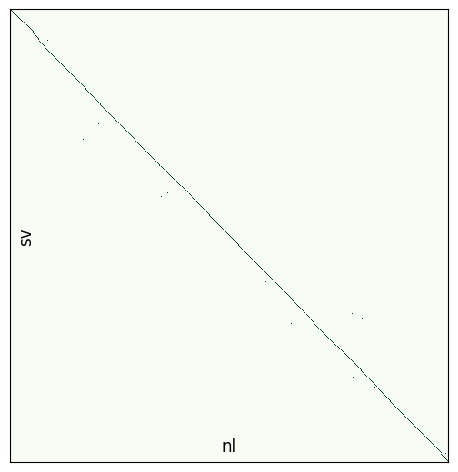

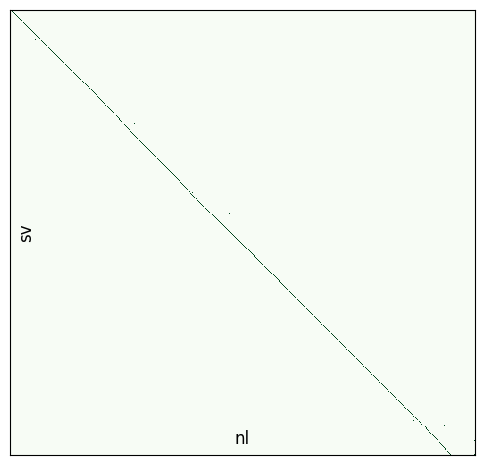

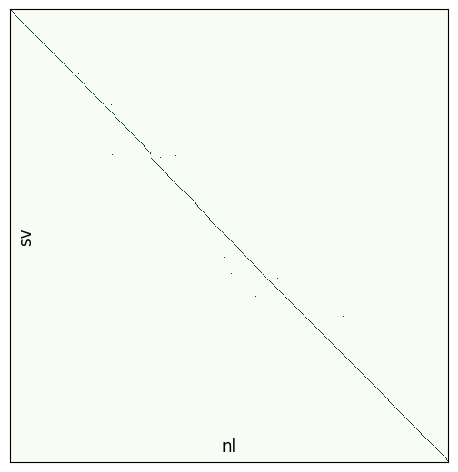

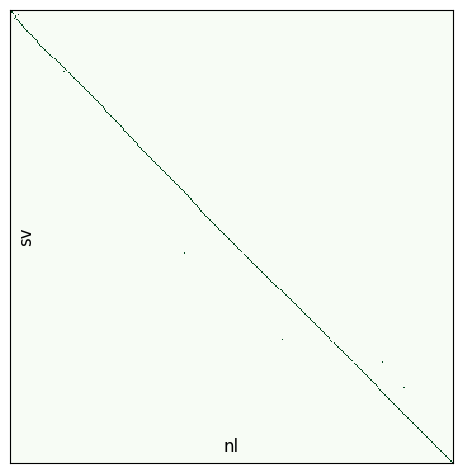

In [ ]:
vis_helper.visualize_alignment_by_db(db_path,
                                    output_path="alignment_vis.png",
                                    lang_name_from=lang_from,
                                    lang_name_to=lang_to,
                                    batch_size=500,
                                    size=(600,600),
                                    plt_show=True
                                    )

Let's look at the picture. The alignment is predictable from start to finish, but there are conflicts. Looking at the picture, we see that there are continuous chains, there are gaps and there are outliers.  Everything that is between the chains is called a conflict.
With this definition of the conflict, you can measure its size and choose a resolution strategy.

- most of the times the conflicts fall between the parameters min_chain_length=2, max_conflicts_len=6. This are generally good values but you can change it if you want

In this case, the   conflicts that correspond to the specified search parameters will fall into the conflicts_to_solve variable, and the  rest will fall into the rest variable  .

Let's display the statistics about the conflicts:



In [ ]:
conflicts_to_solve, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=6, batch_id=-1)

resolver.get_statistics(conflicts_to_solve)
resolver.get_statistics(rest)

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 937
total conflicts: 1180
('2:1', 357)
('3:2', 184)
('3:3', 173)
('2:3', 141)
('4:3', 19)
('4:2', 17)
('4:4', 9)
('5:4', 7)
('3:4', 6)
('5:5', 6)
('3:1', 5)
('2:4', 3)
('5:2', 3)
('4:5', 1)
('3:6', 1)
('6:5', 1)
('5:6', 1)
('6:6', 1)
('3:5', 1)
('6:4', 1)
('13:-12', 2)
('6:7', 2)
('5:0', 2)
('2:-10', 2)
('35:80', 1)
('4:-15', 1)
('23:61', 1)
('29:-39', 1)
('74:70', 1)
('85:141', 1)
('9:-50', 1)
('2:23', 1)
('6:-3', 1)
('31:51', 1)
('62:28', 1)
('41:47', 1)
('27:69', 1)
('11:-37', 1)
('34:43', 1)
('4:51', 1)
('26:-31', 1)
('31:89', 1)
('11:-49', 1)
('64:62', 1)
('10:15', 1)
('26:68', 1)
('14:-35', 1)
('87:84', 1)
('83:106', 1)
('11:2', 1)
('11:59', 1)
('4:-61', 1)
('4:74', 1)
('56:18', 1)
('63:26', 1)
('45:55', 1)
('7:46', 1)
('40:17', 1)
('5:41', 1)
('70:1', 1)
('34:53', 1)
('33:24', 1)
('69:85', 1)
('33:85', 1)
('19:-61', 1)
('64:77', 1)
('61:85', 1)
('18:56', 1)
('57:-22', 1)
('5:19', 1)
('143

defaultdict(int,
            {'35:80': 1,
             '4:-15': 1,
             '23:61': 1,
             '29:-39': 1,
             '74:70': 1,
             '85:141': 1,
             '9:-50': 1,
             '2:23': 1,
             '6:-3': 1,
             '31:51': 1,
             '62:28': 1,
             '41:47': 1,
             '27:69': 1,
             '11:-37': 1,
             '34:43': 1,
             '4:51': 1,
             '26:-31': 1,
             '31:89': 1,
             '11:-49': 1,
             '64:62': 1,
             '10:15': 1,
             '26:68': 1,
             '14:-35': 1,
             '87:84': 1,
             '83:106': 1,
             '11:2': 1,
             '11:59': 1,
             '4:-61': 1,
             '4:74': 1,
             '56:18': 1,
             '63:26': 1,
             '45:55': 1,
             '7:46': 1,
             '40:17': 1,
             '5:41': 1,
             '70:1': 1,
             '34:53': 1,
             '33:24': 1,
             '69:85': 1,
         

Here you can see what kind of conflict the algorithms had, we see that the most common conflict is 2:1 this means that 2 source sentences are mapped to 1 target sentence.

You can look at a specific conflict with the following command:

```
resolver.show_conflict(db_path, conflicts_to_solve[your desired conflict])
```
- Your desired conflict is conflict x - 1. As default we take a look at the first conflict.


In [ ]:
resolver.show_conflict(db_path, conflicts_to_solve[0])

63 Hon letar i sitt huvud och bland träden efter ett svar.
64 Det finns inget.
65 Det finns ingenting.
66 2.
67 Sent på kvällen hittar vårdarna Kristina Tacker.


62 Ze zoekt in haar hoofd en tussen de stammen naar een antwoord.
63 Dat is er niet.
64 Er is niets.
65 2 ’s Avonds laat vinden de verzorgers Kristina Tacker.
-----------------------------------------------


({63: 'Hon letar i sitt huvud och bland träden efter ett svar.',
  64: 'Det finns inget.',
  65: 'Det finns ingenting.',
  66: '2.',
  67: 'Sent på kvällen hittar vårdarna Kristina Tacker.'},
 {62: 'Ze zoekt in haar hoofd en tussen de stammen naar een antwoord.',
  63: 'Dat is er niet.',
  64: 'Er is niets.',
  65: '2 ’s Avonds laat vinden de verzorgers Kristina Tacker.'})

For resolving the conflicts we do the following. first we look for conflicts with a minimum length of a good chain of 2 (with this parameter, there are the most conflicts) and a maximum conflict length of no more than 6. We resolve all found conflicts, while large conflicts are getting smaller so we partially resolved them. Then we increase both parameters, search and resolve again, finishing off the remainder.

It looks like this:

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 937
total conflicts: 1180


100%|██████████| 937/937 [02:19<00:00,  6.71it/s]


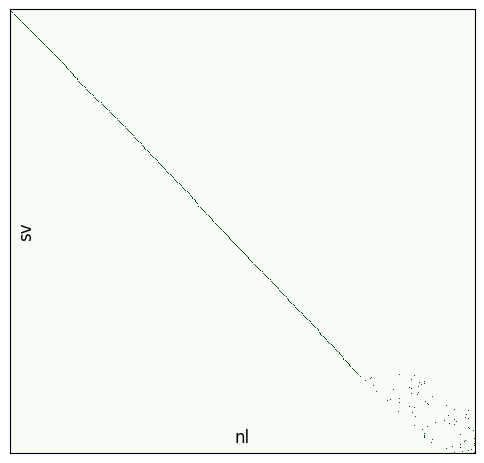

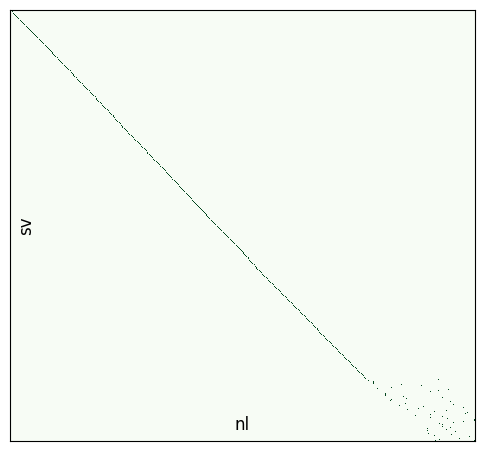

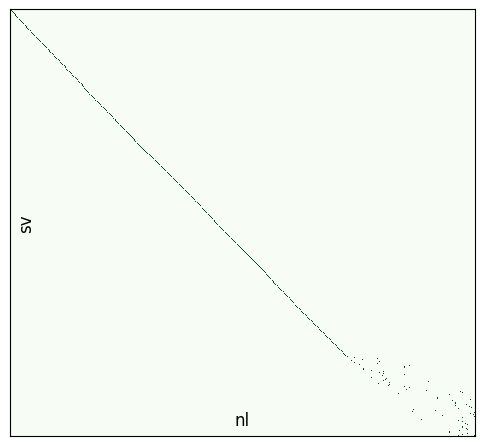

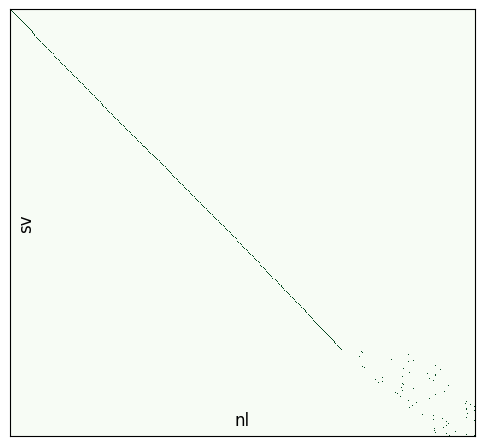

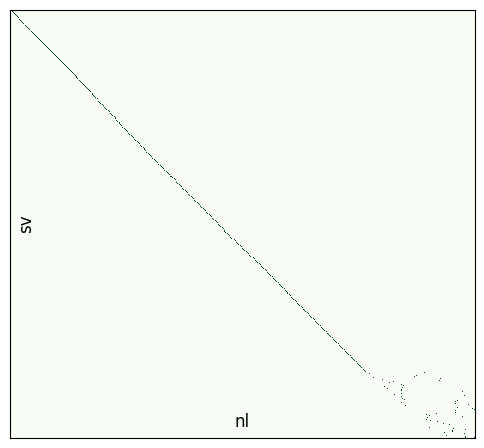

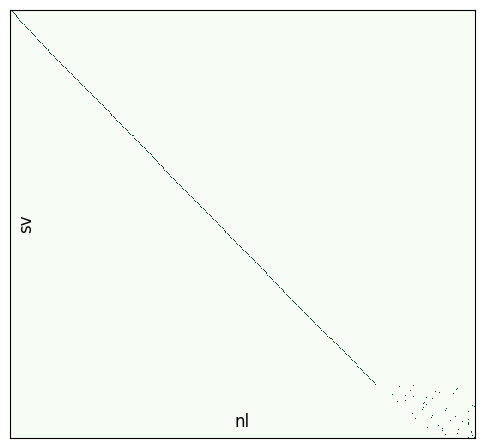

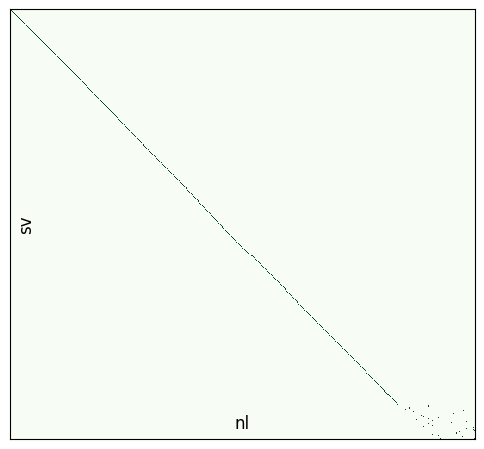

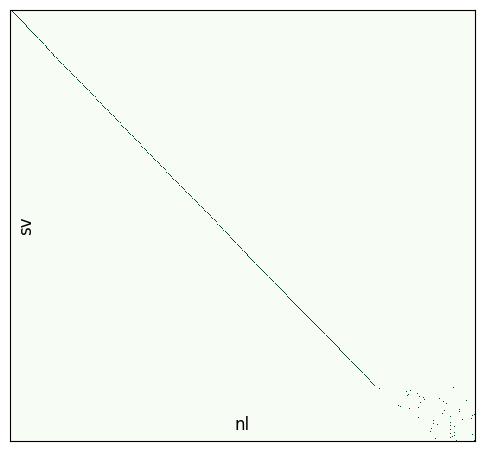

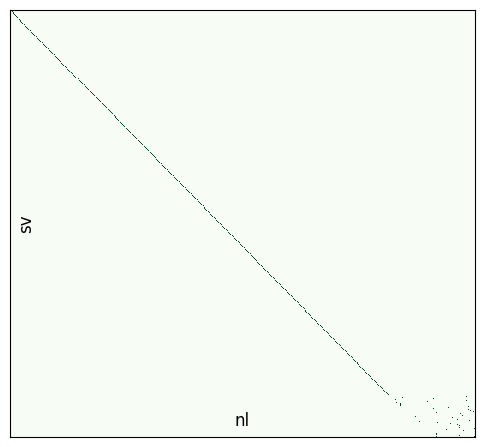

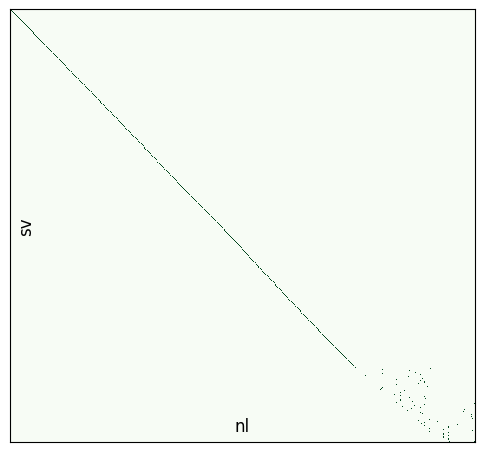

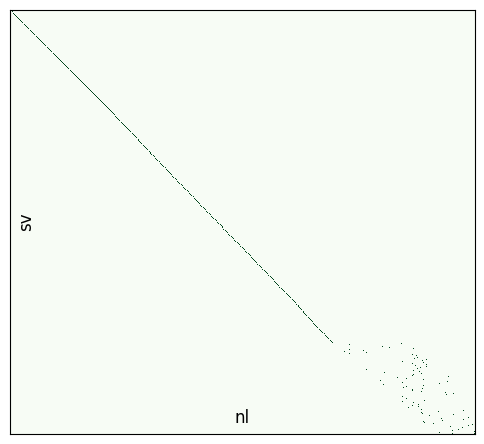

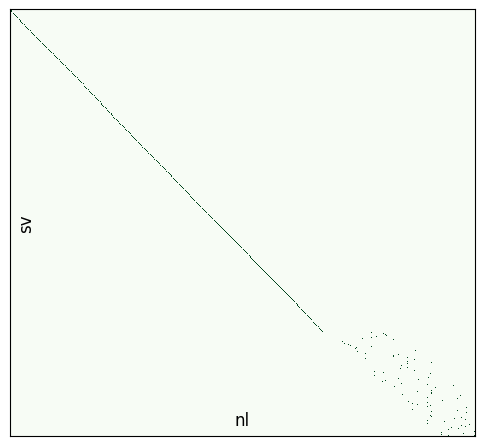

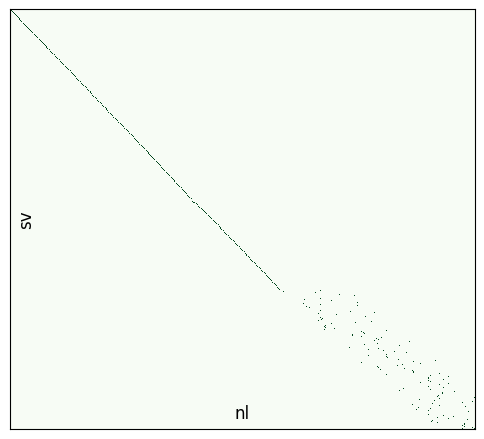

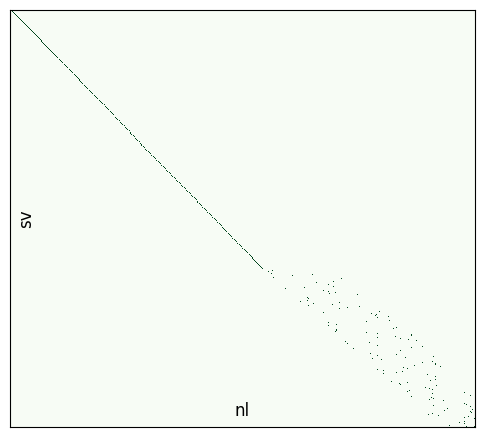

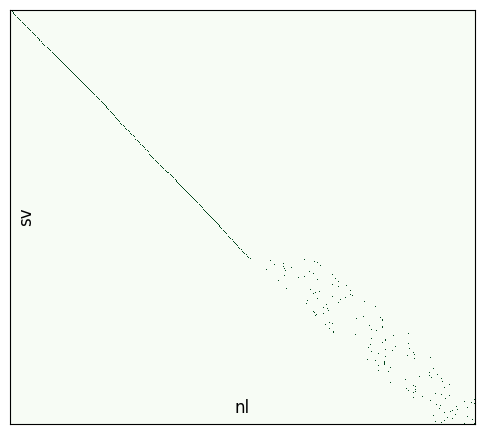

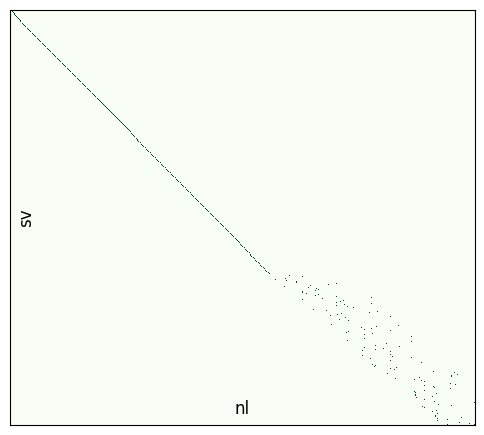

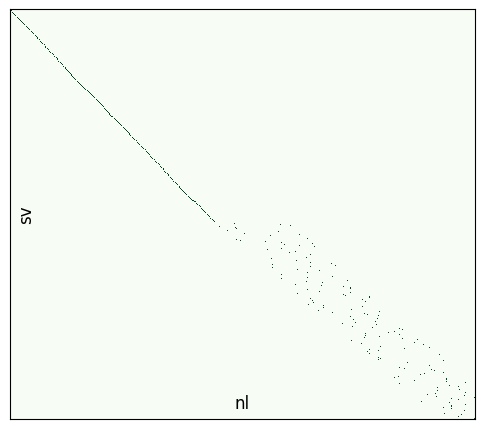

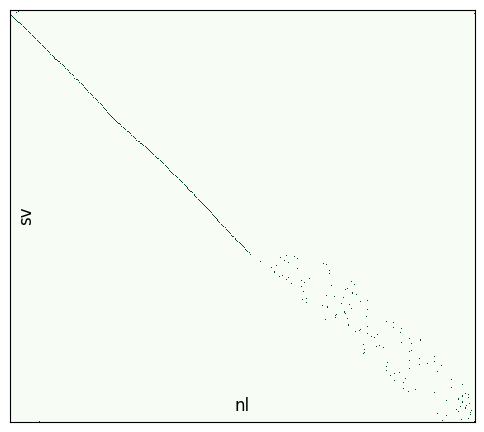

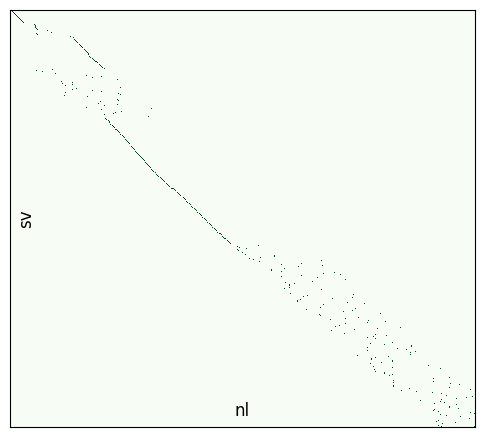

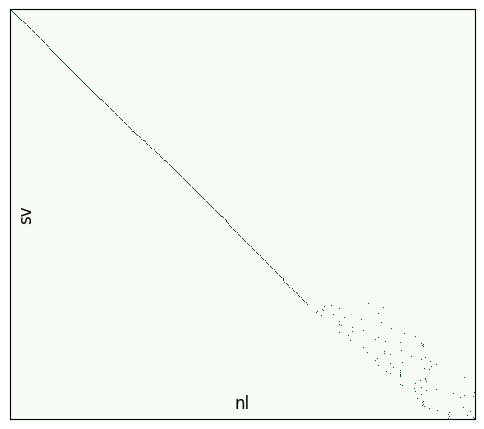

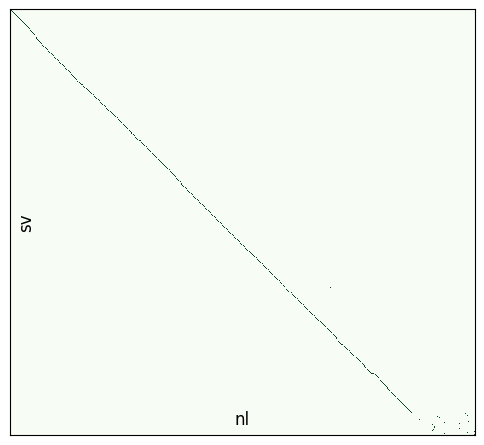

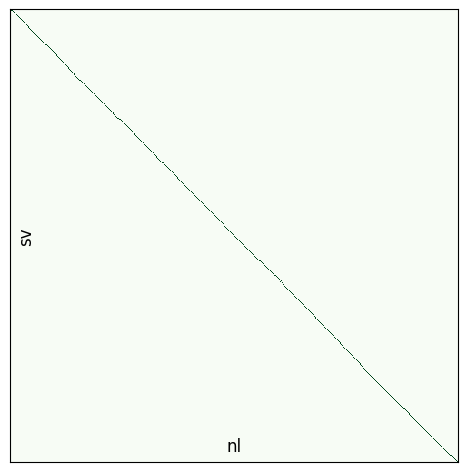

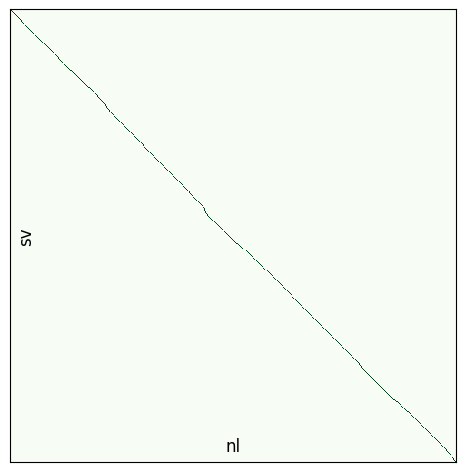

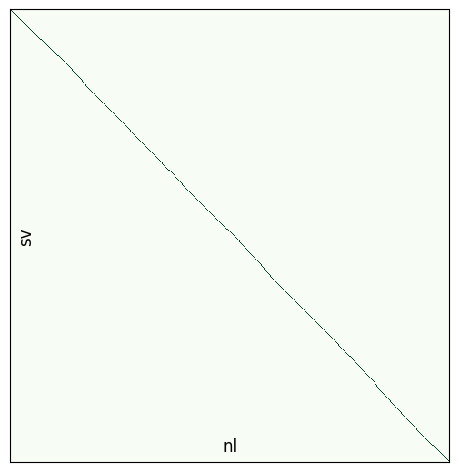

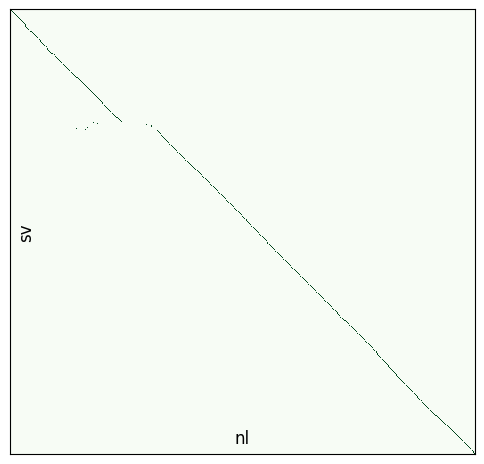

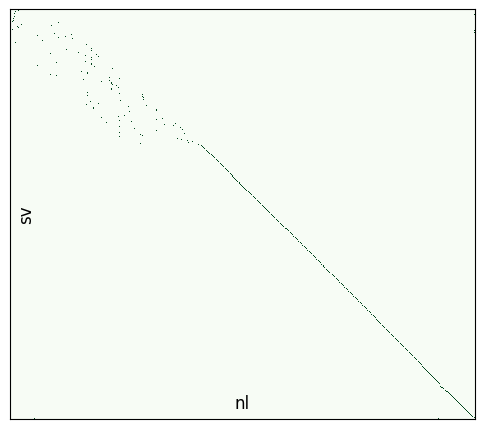

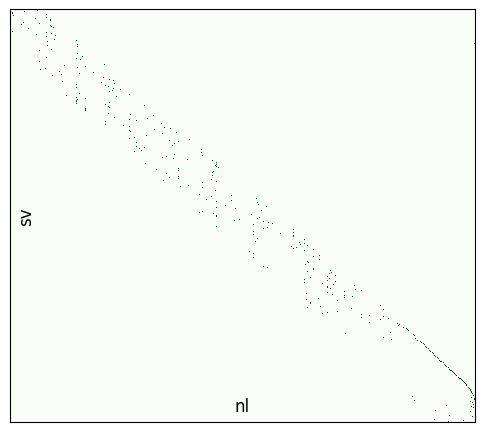

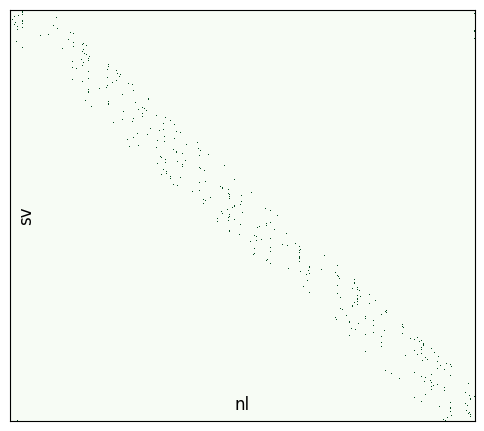

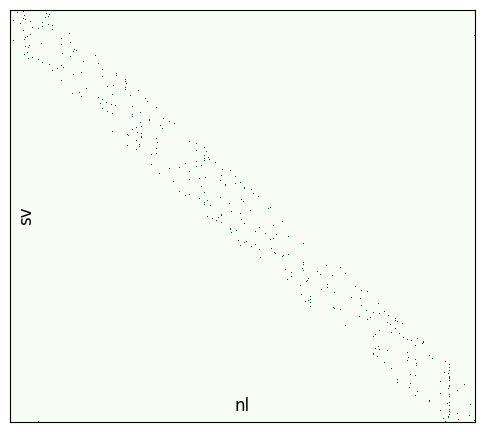

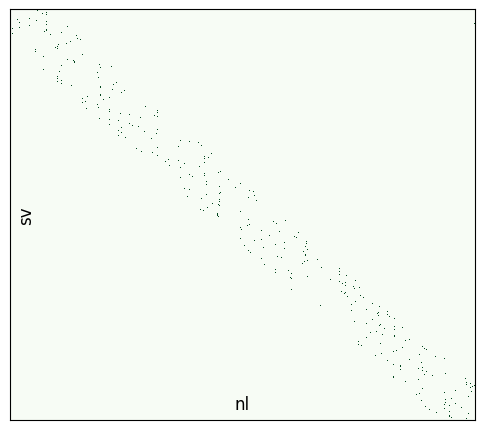

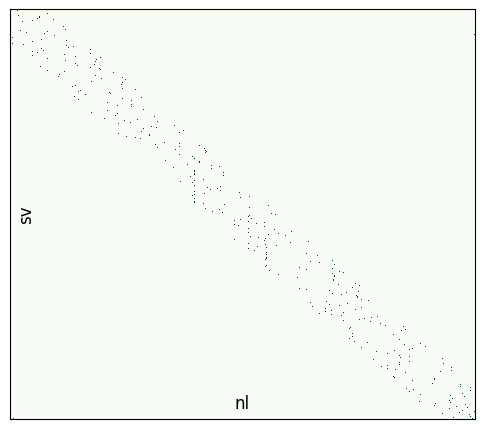

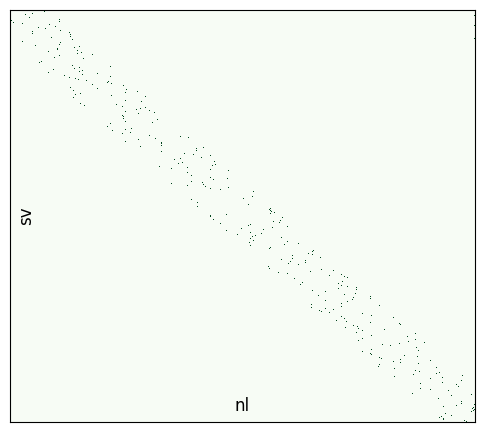

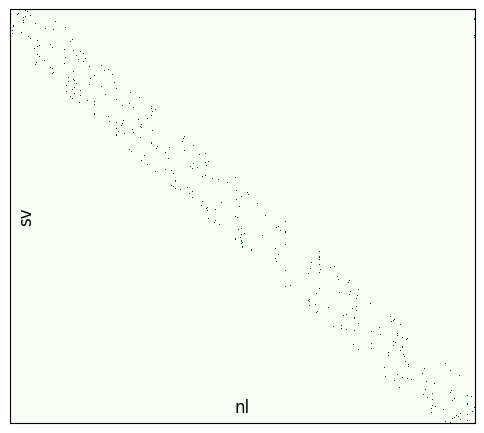

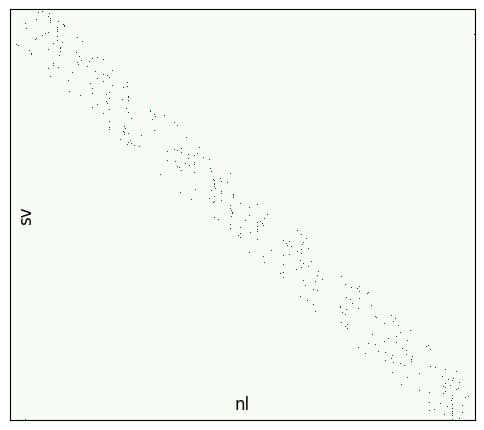

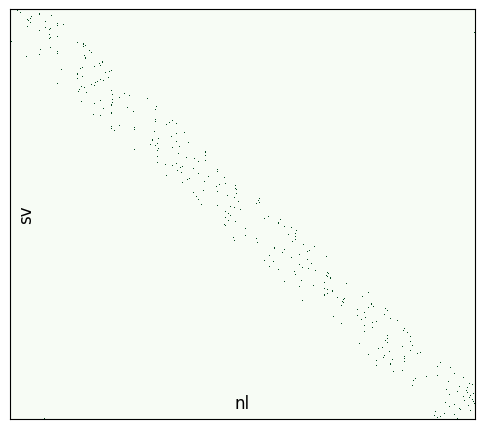

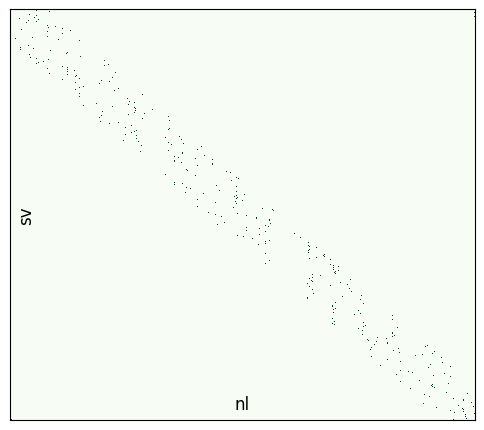

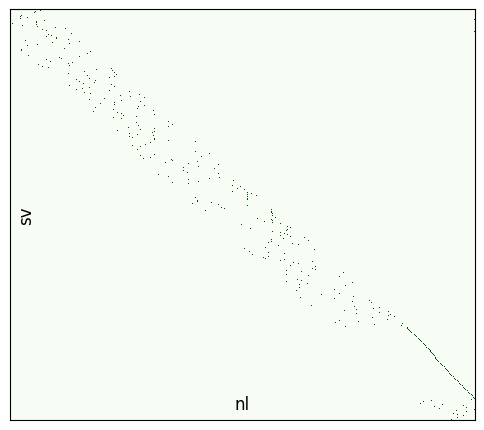

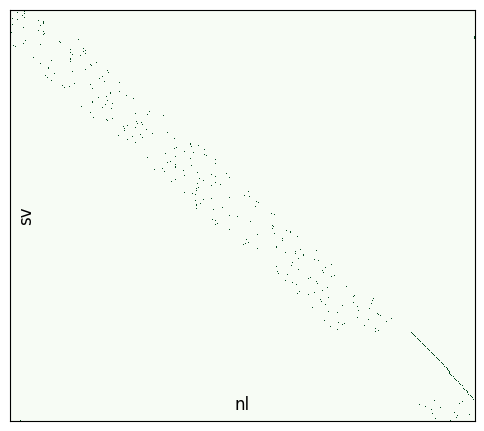

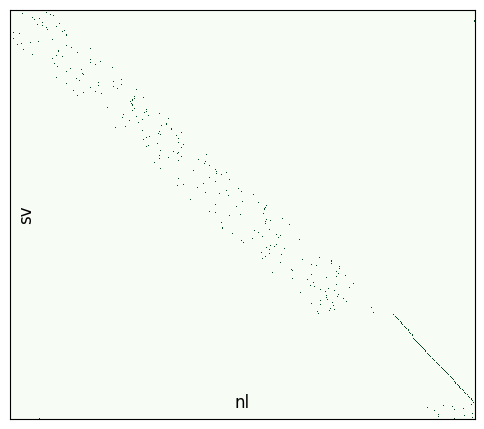

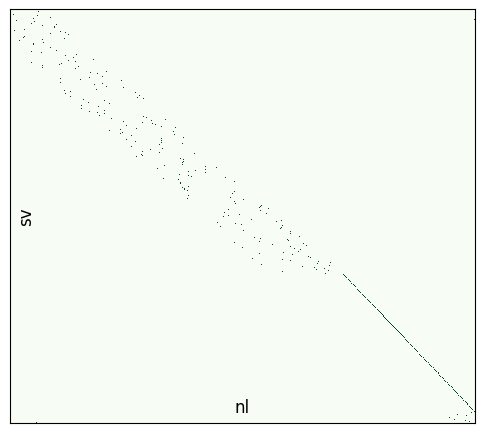

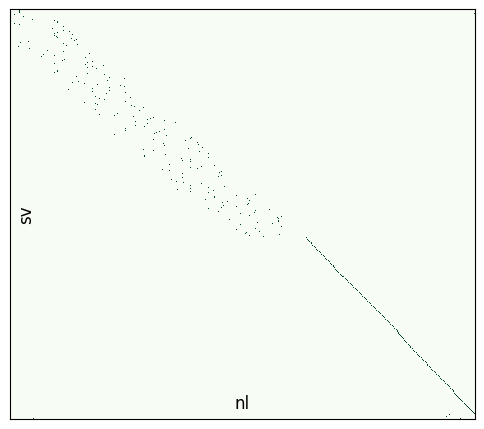

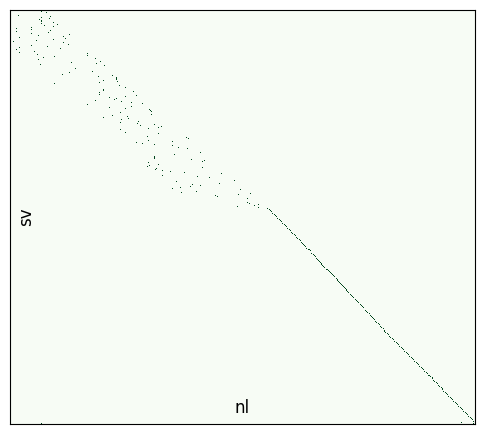

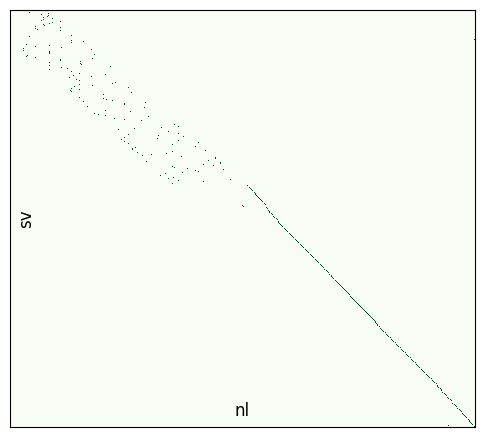

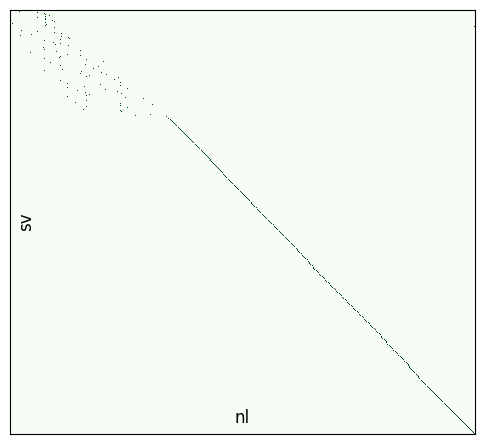

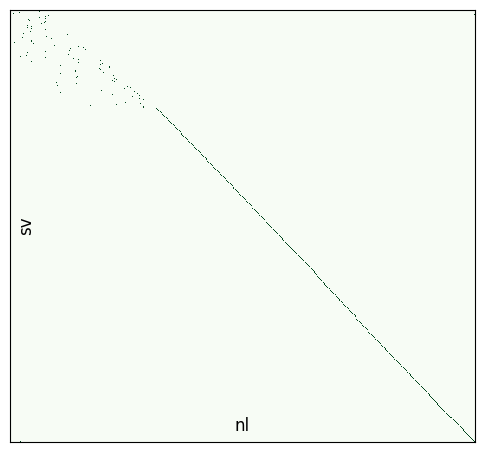

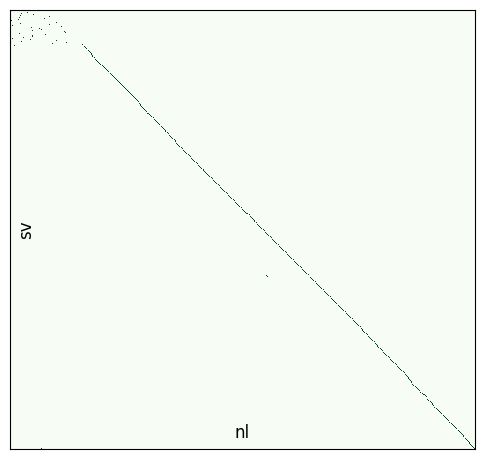

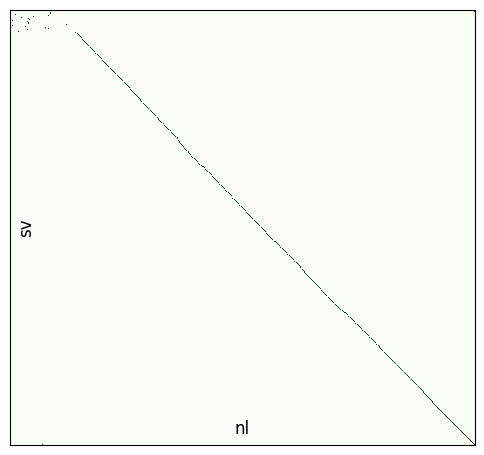

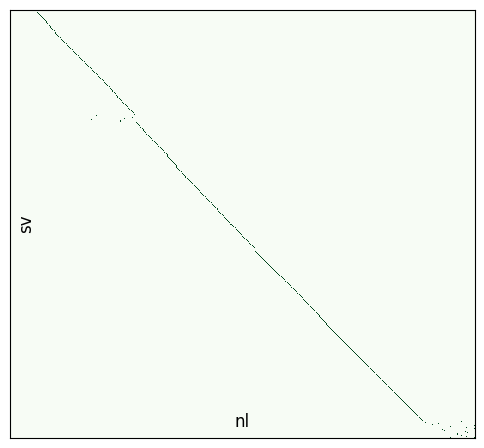

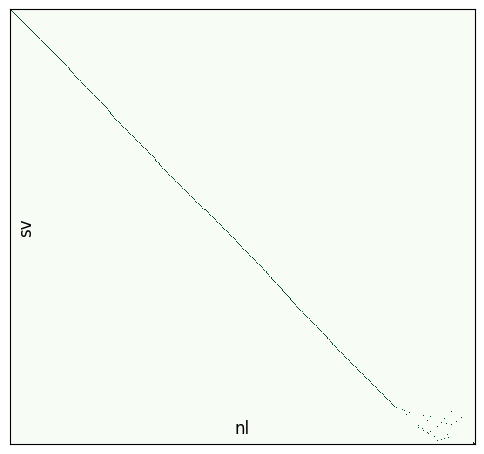

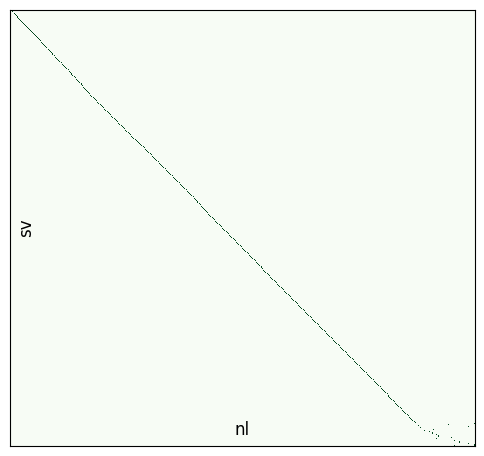

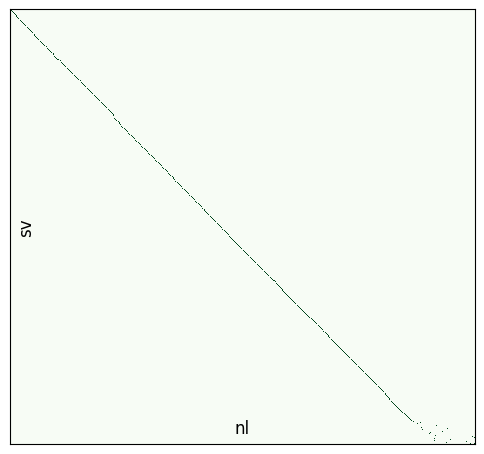

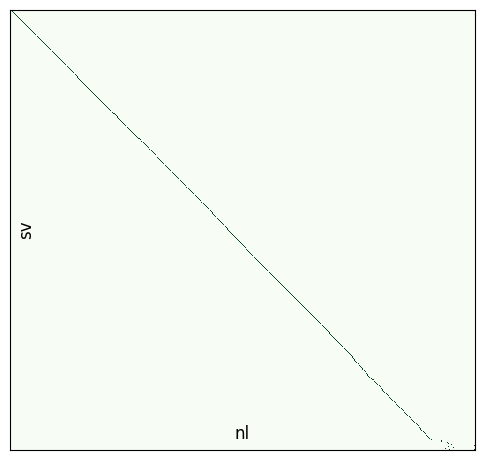

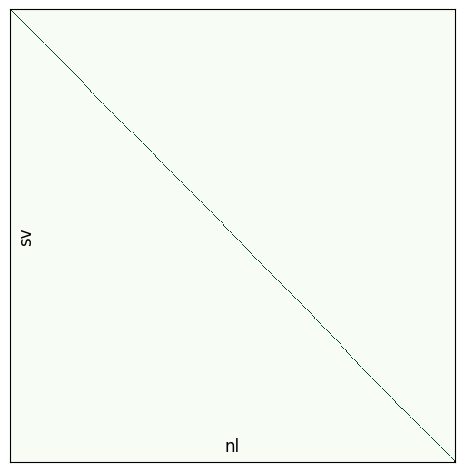

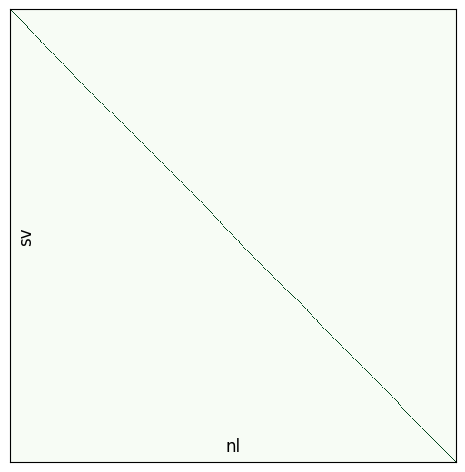

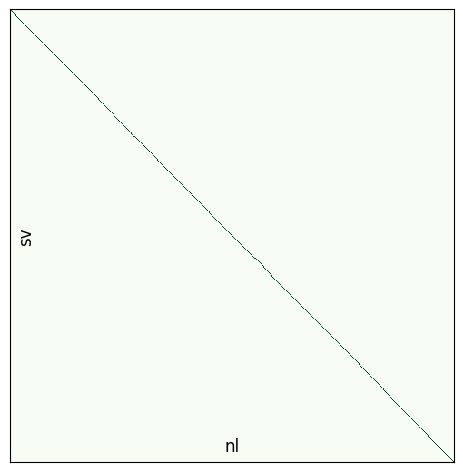

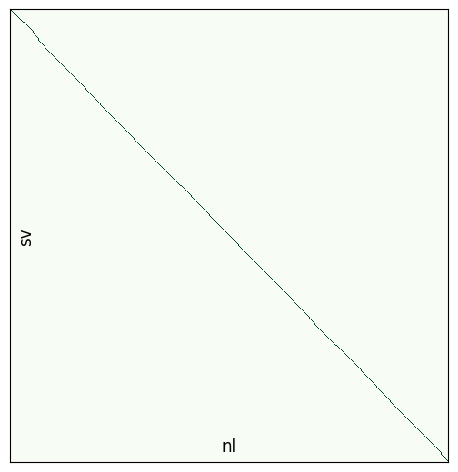

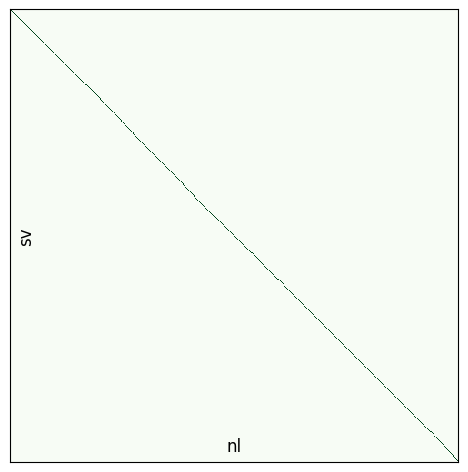

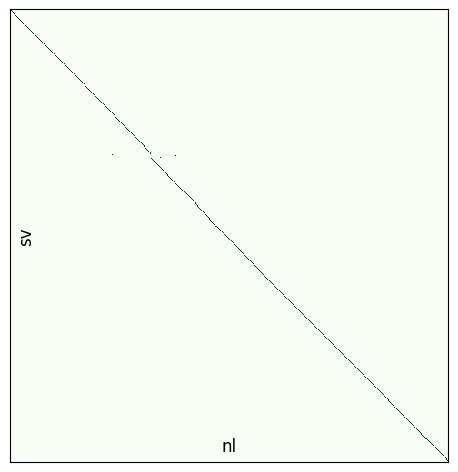

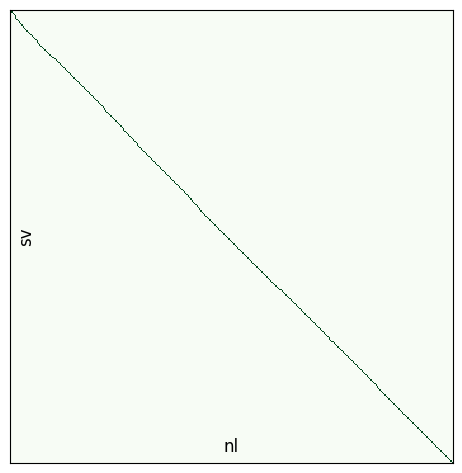

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 10
total conflicts: 57


100%|██████████| 10/10 [00:01<00:00,  5.09it/s]


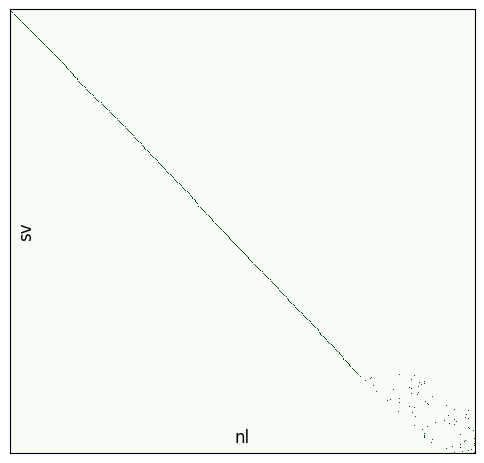

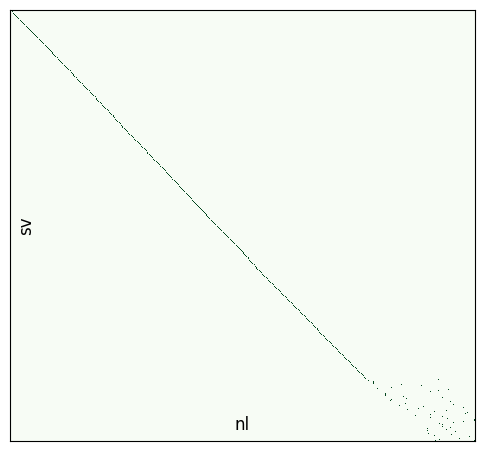

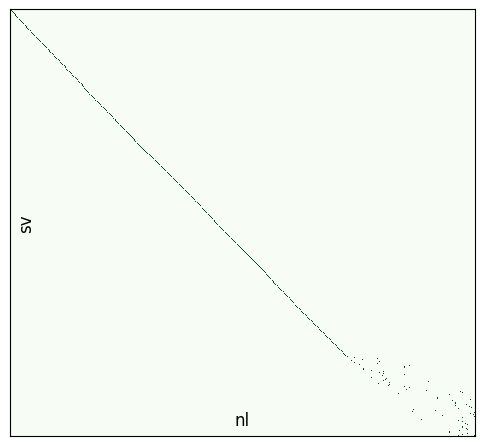

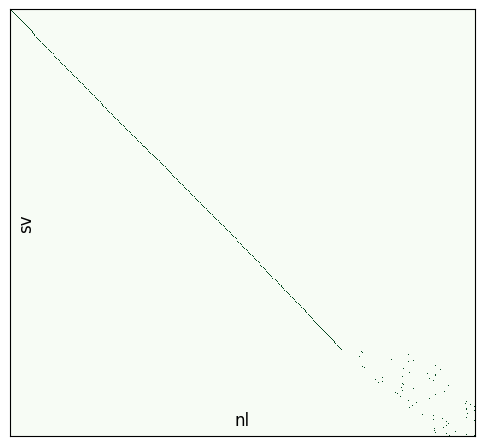

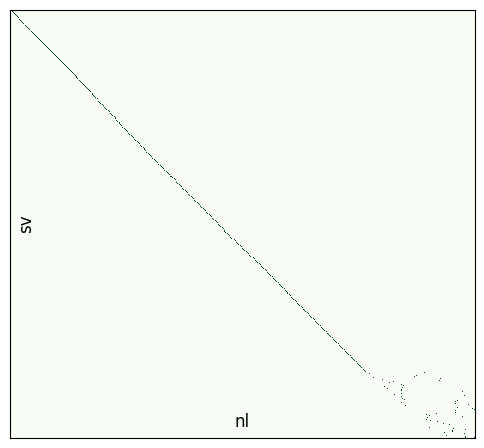

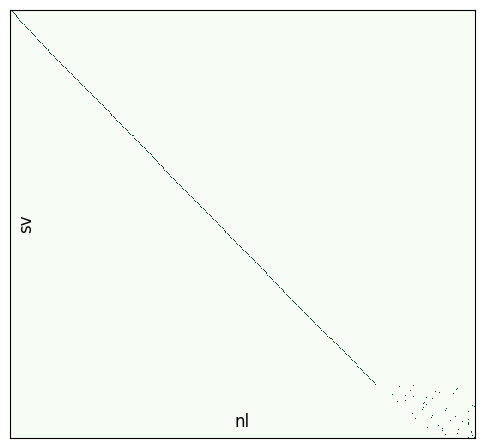

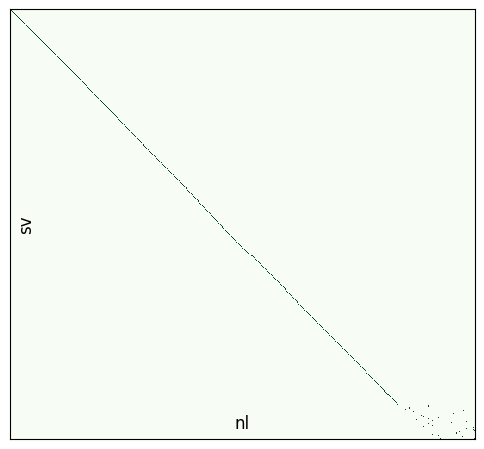

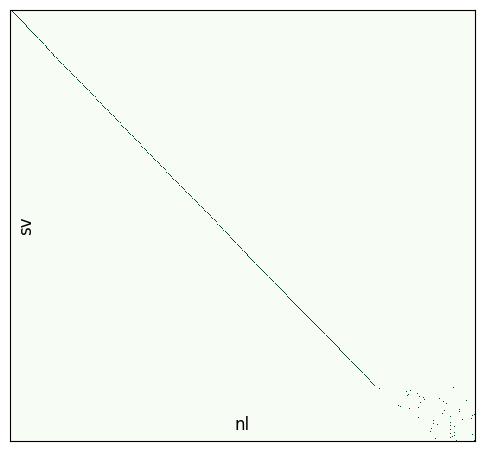

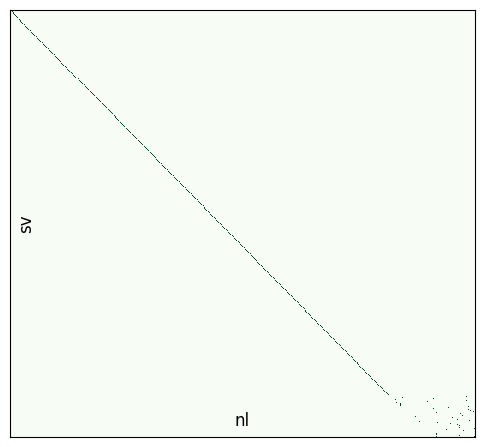

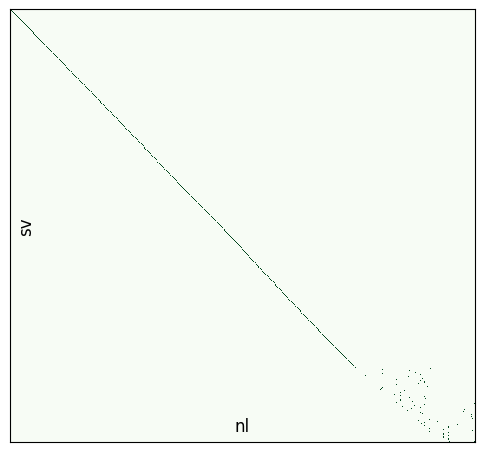

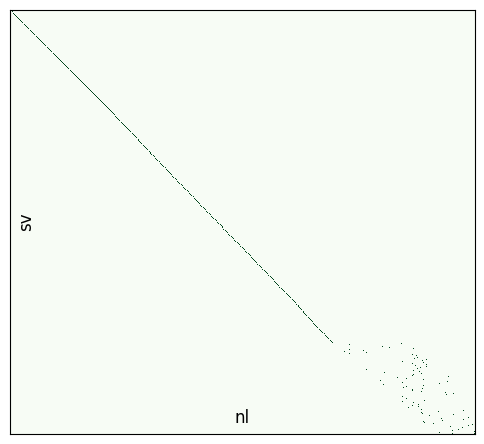

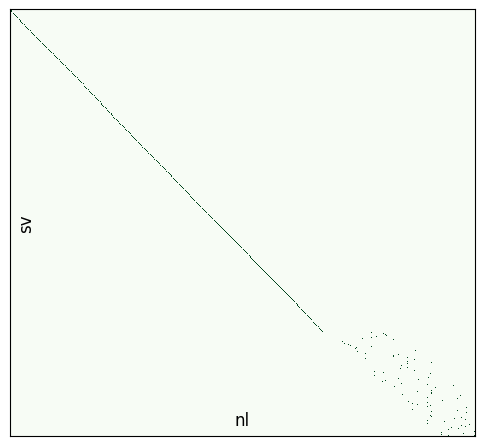

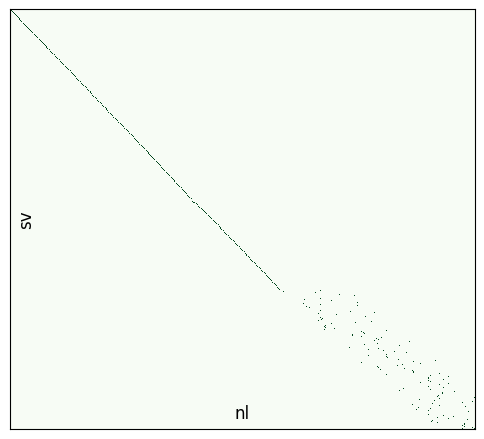

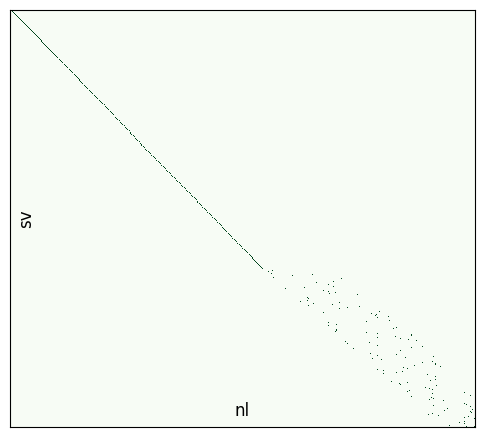

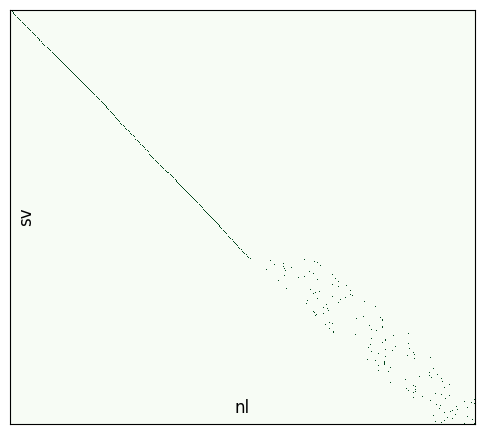

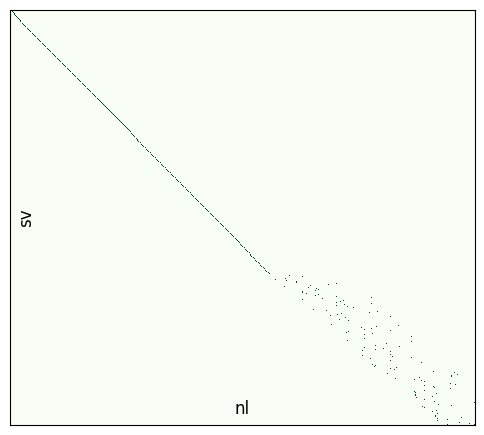

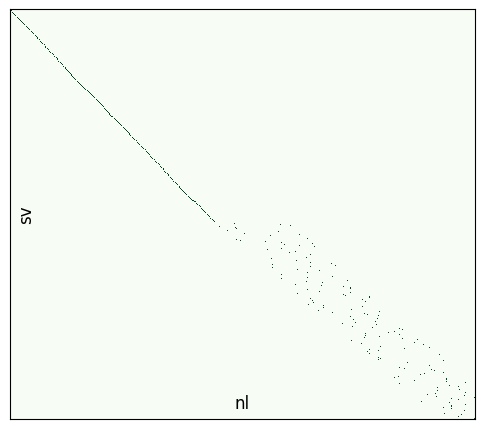

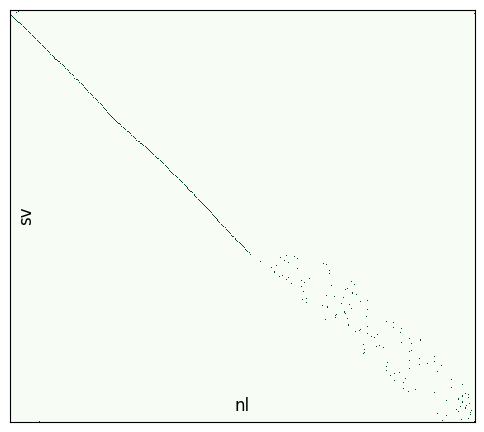

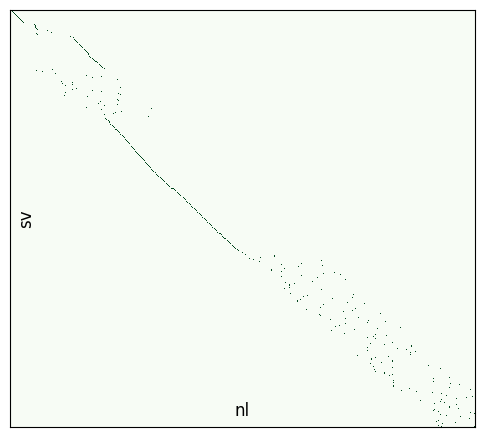

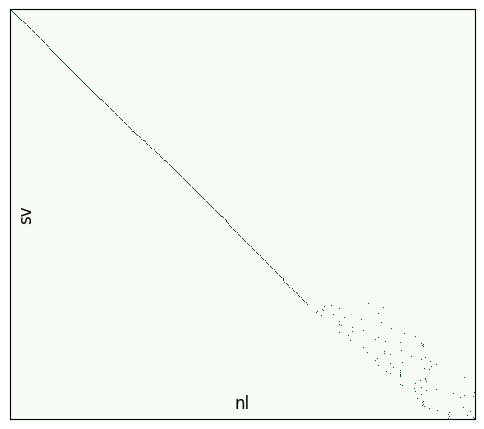

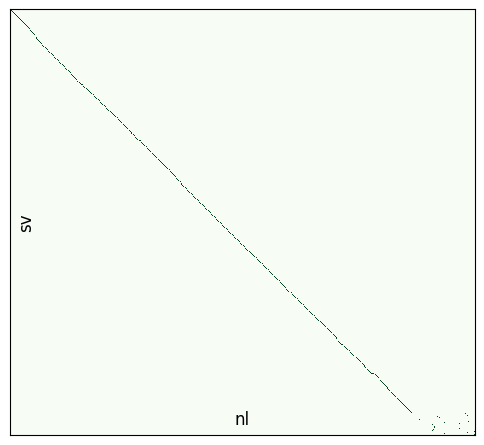

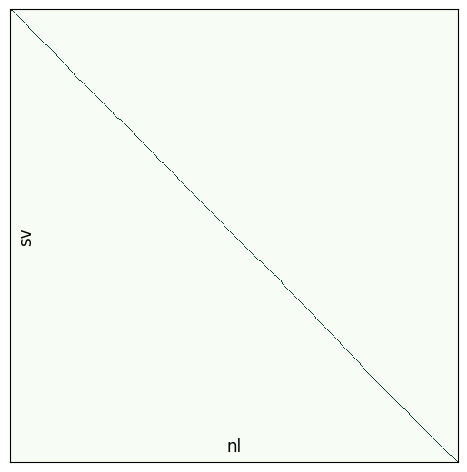

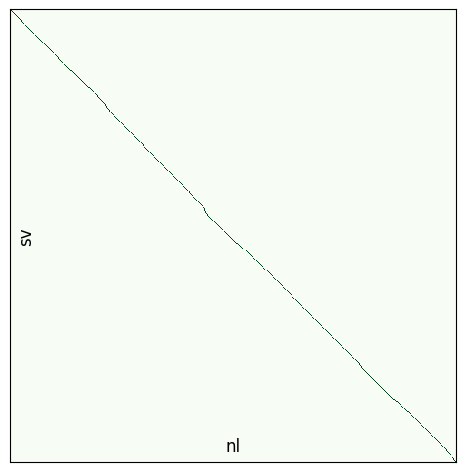

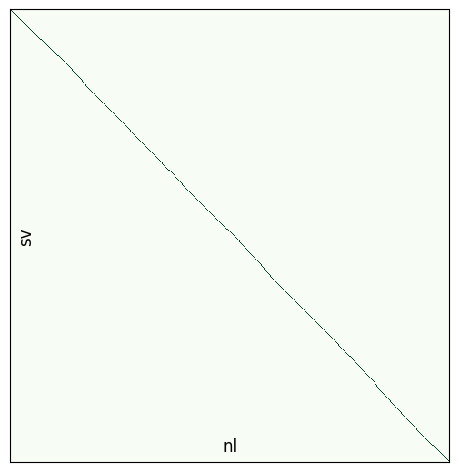

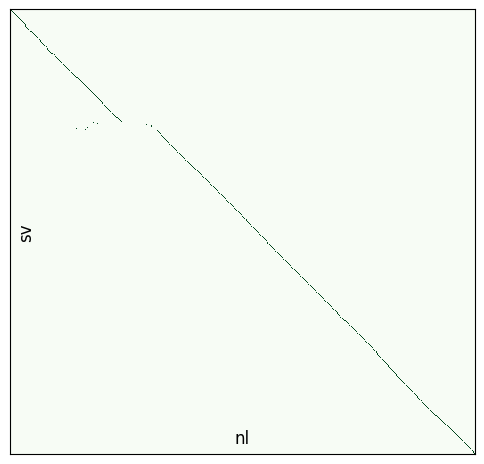

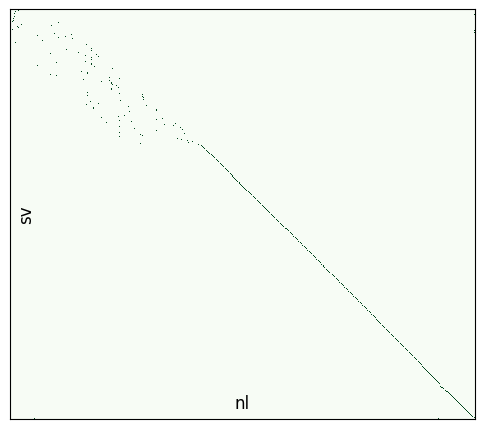

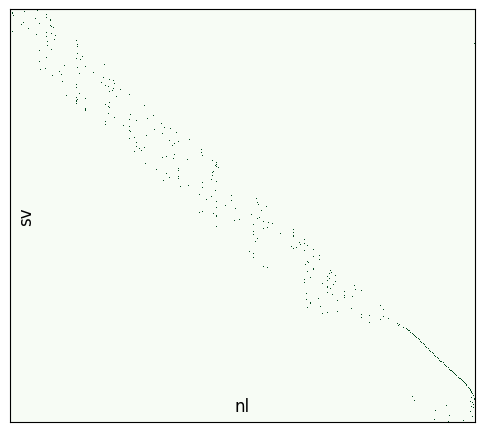

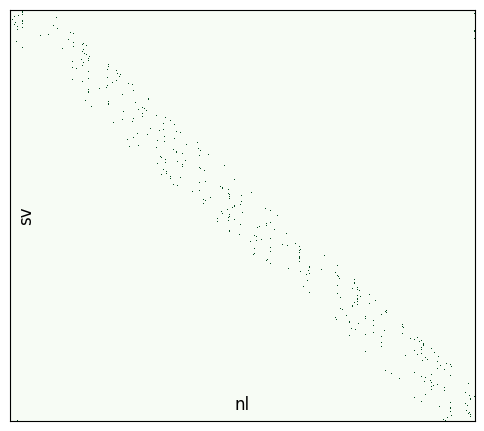

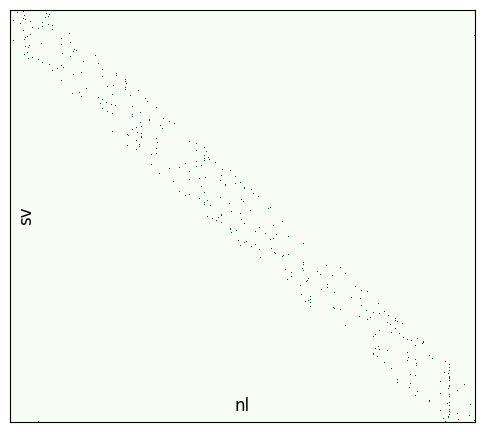

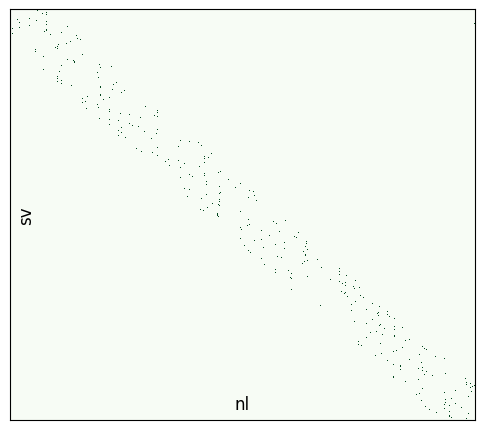

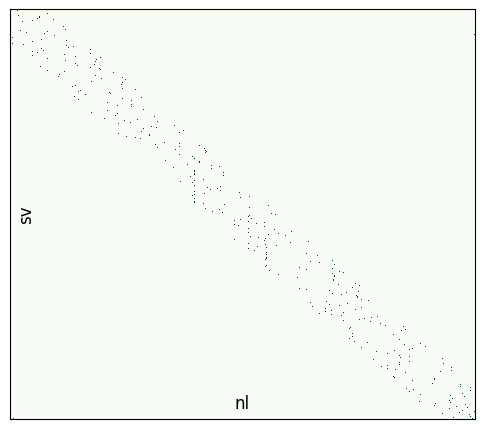

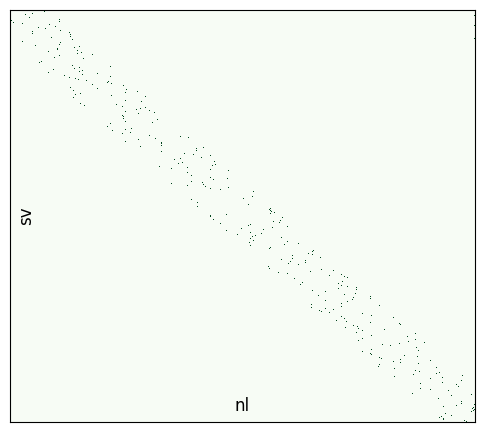

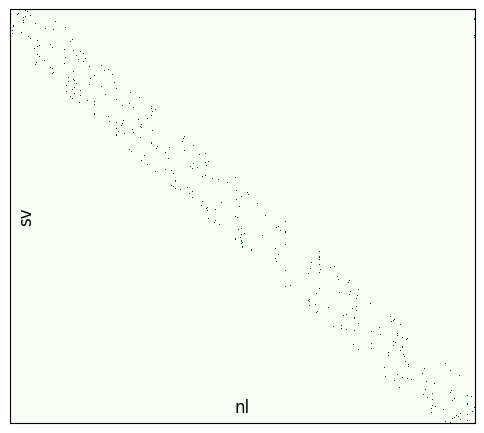

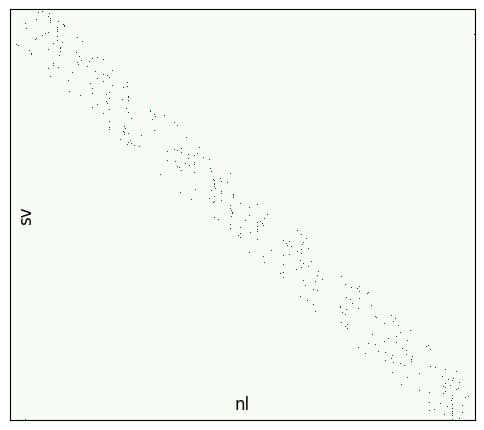

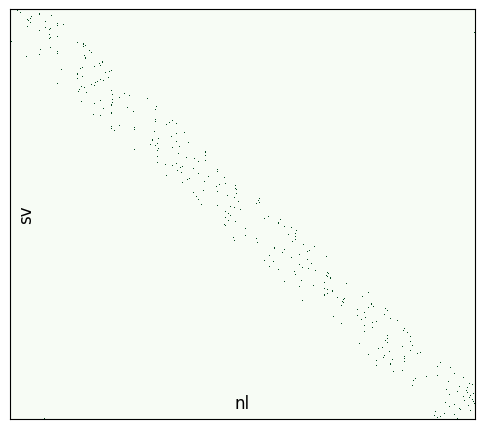

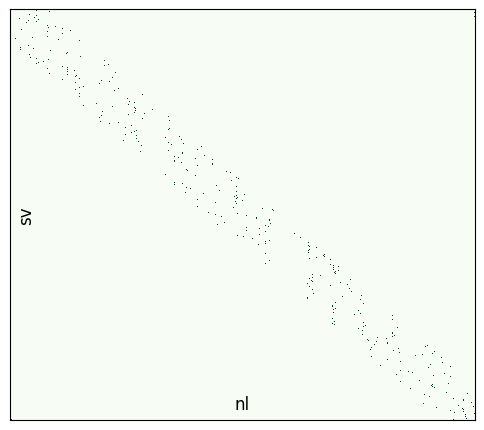

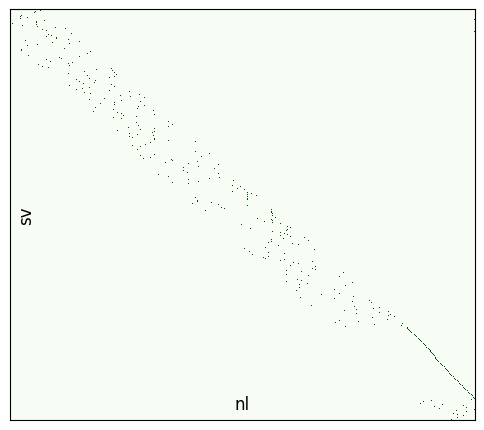

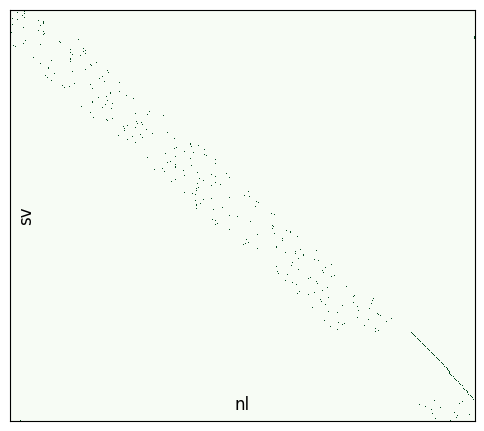

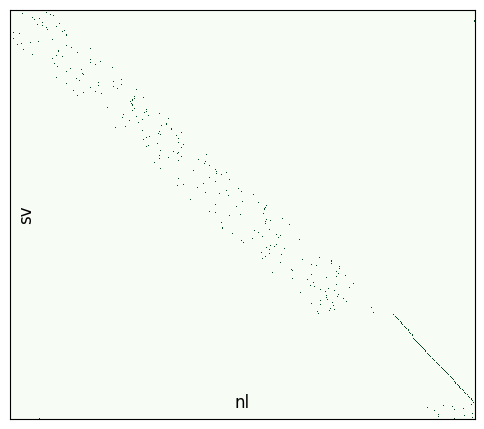

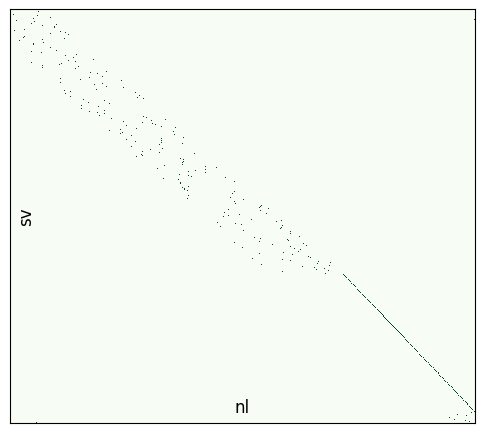

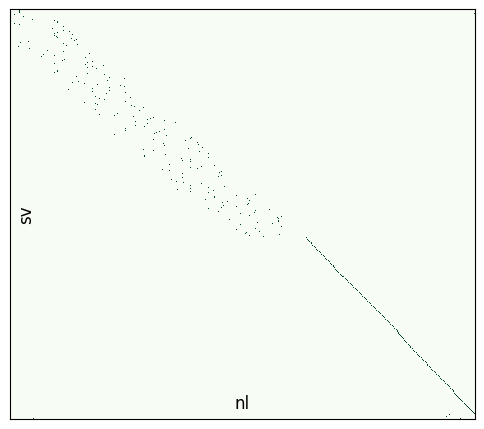

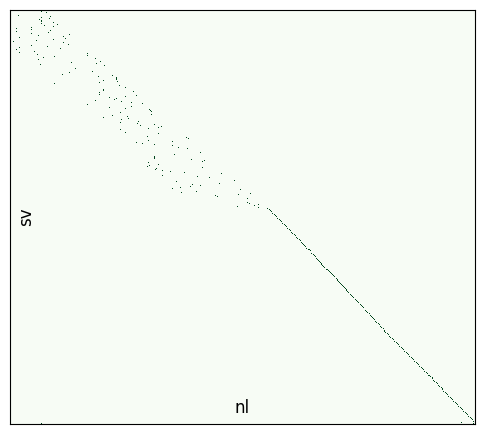

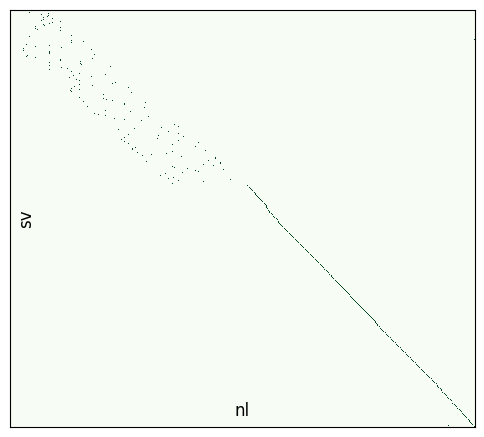

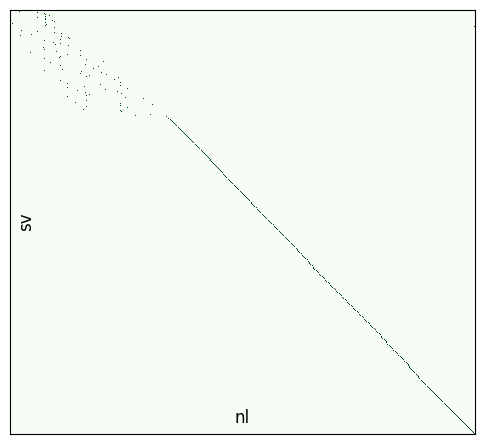

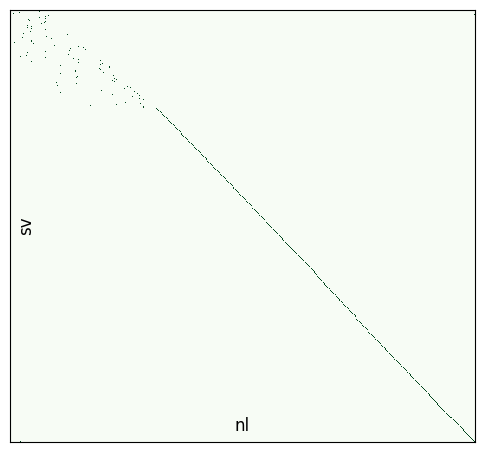

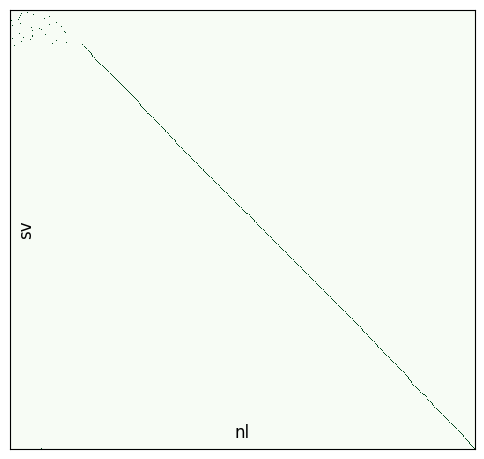

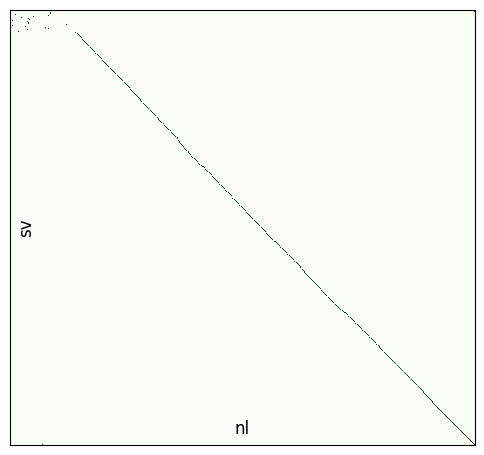

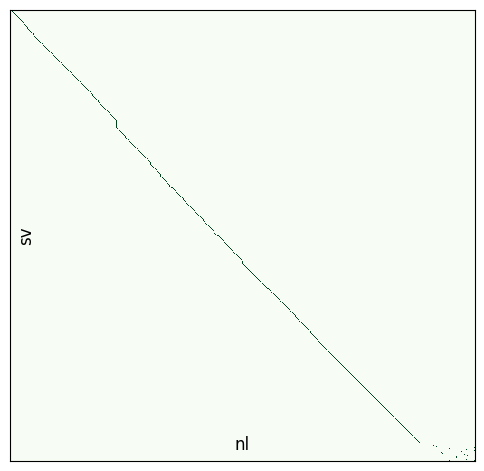

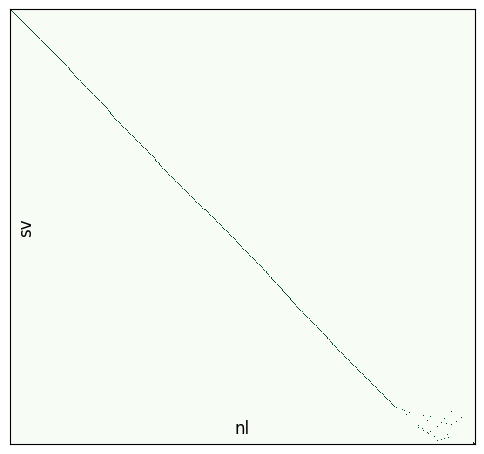

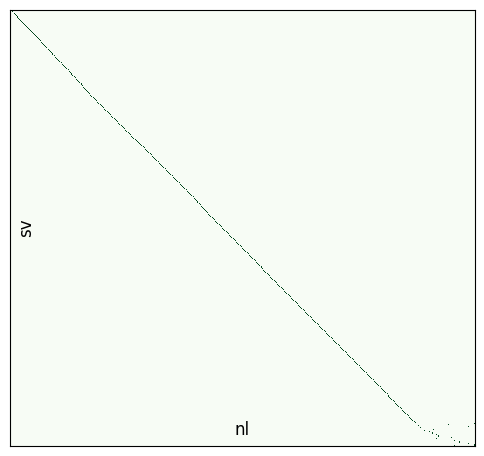

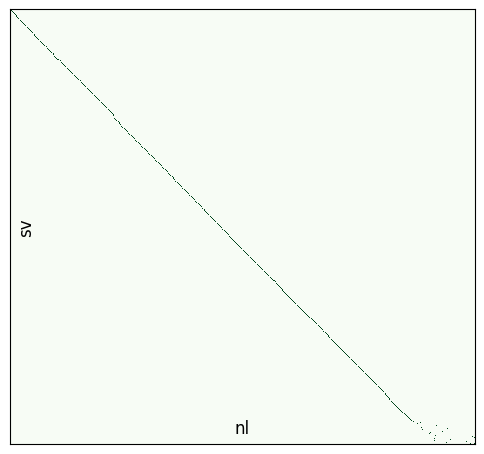

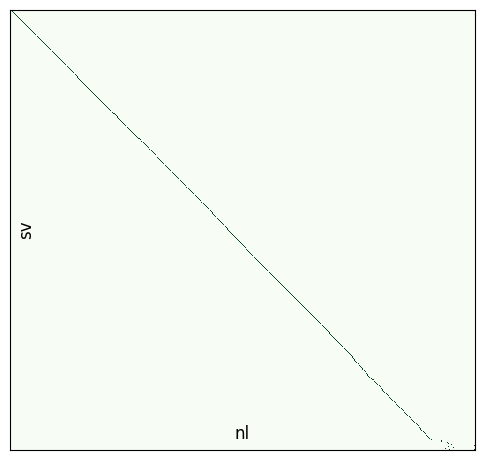

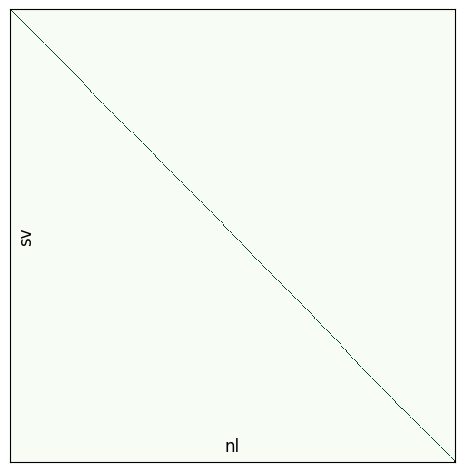

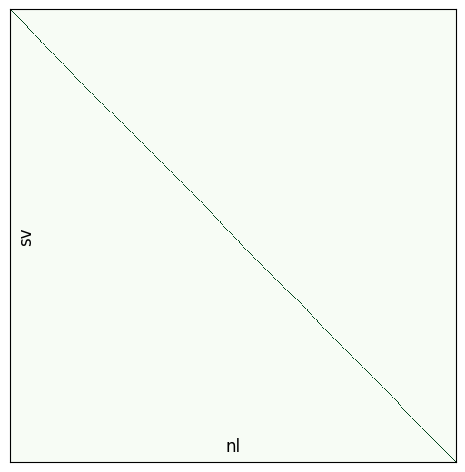

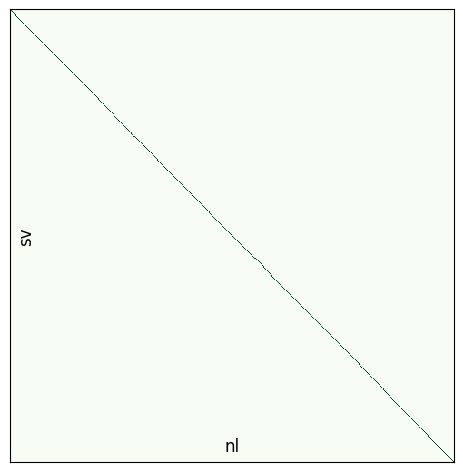

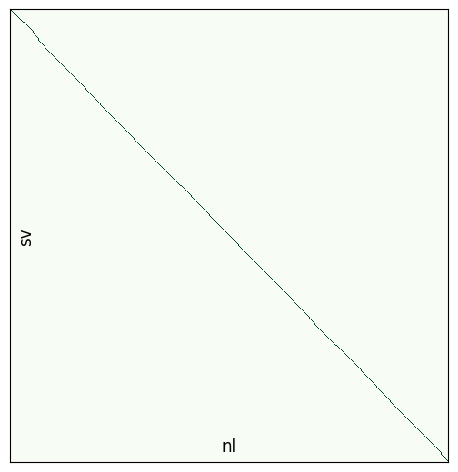

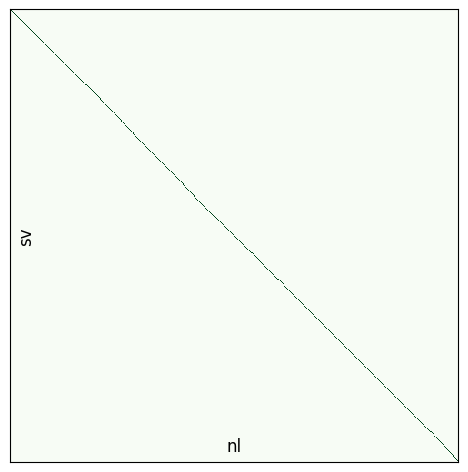

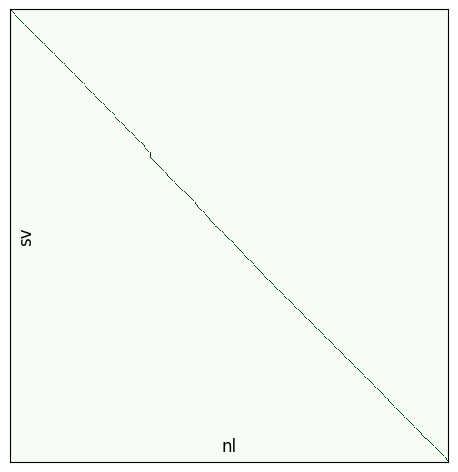

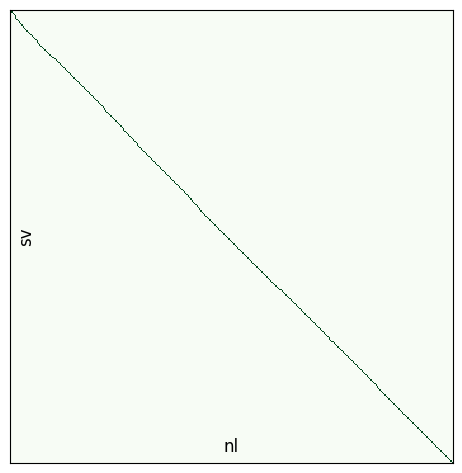

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 2
total conflicts: 43


100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


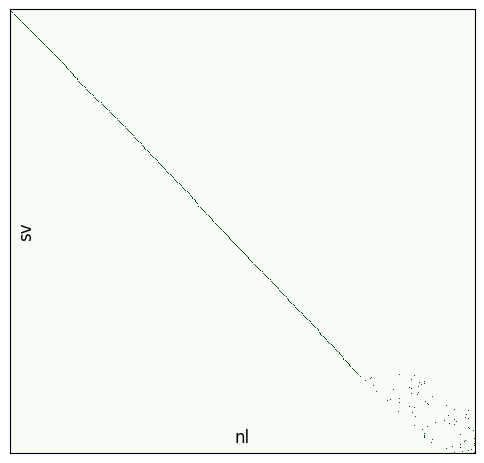

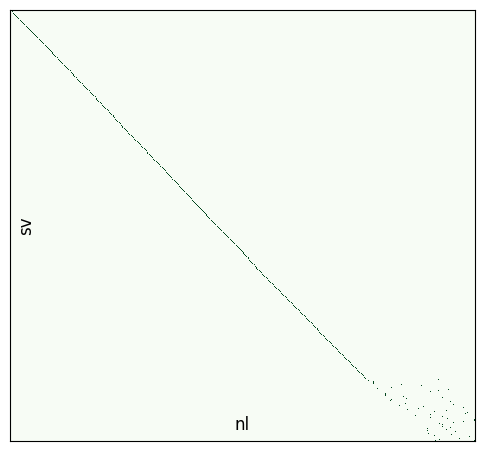

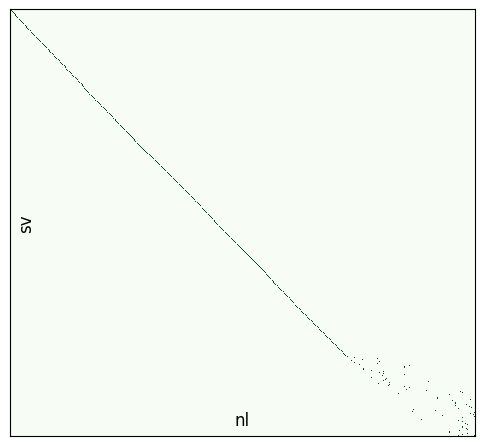

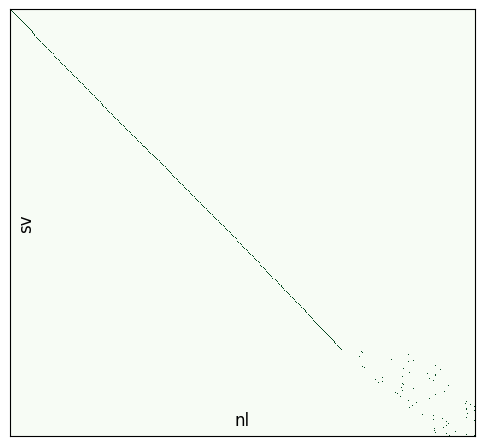

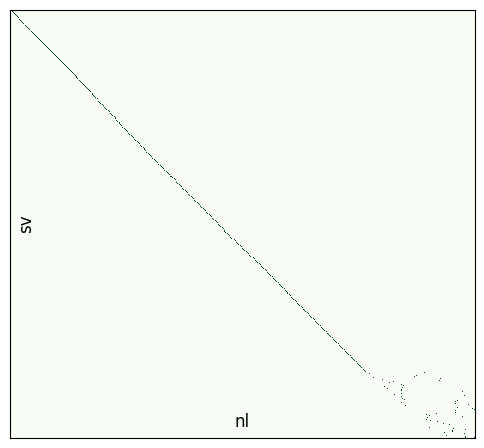

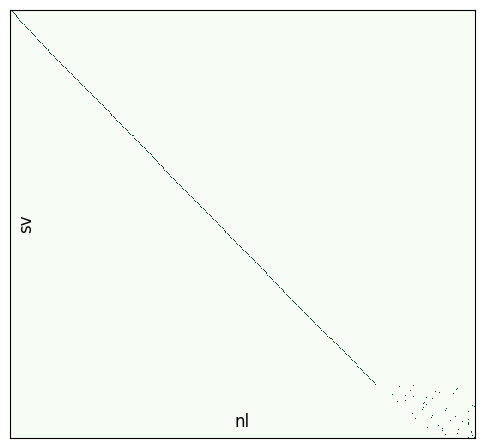

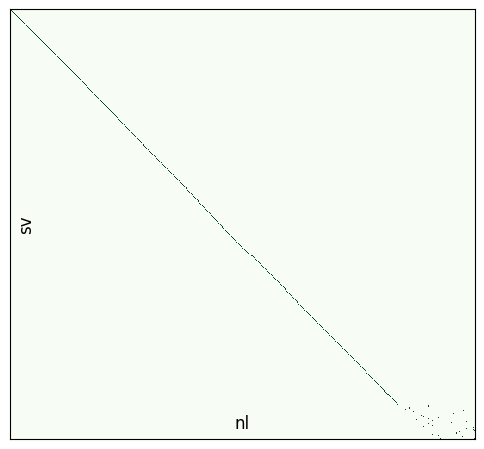

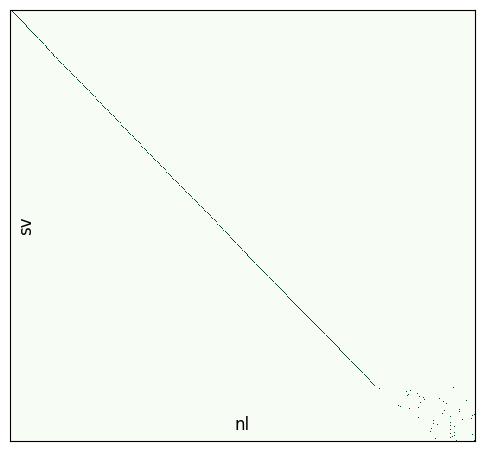

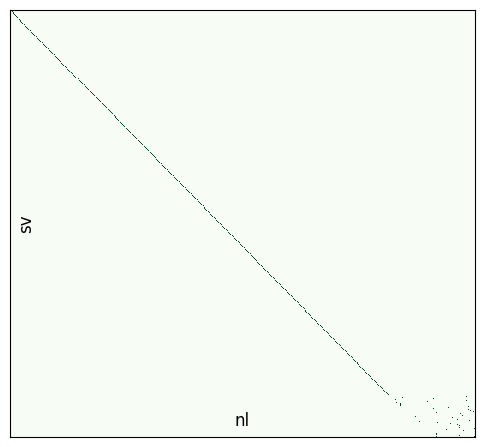

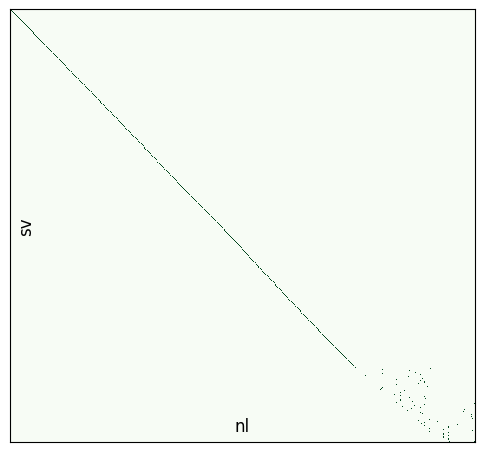

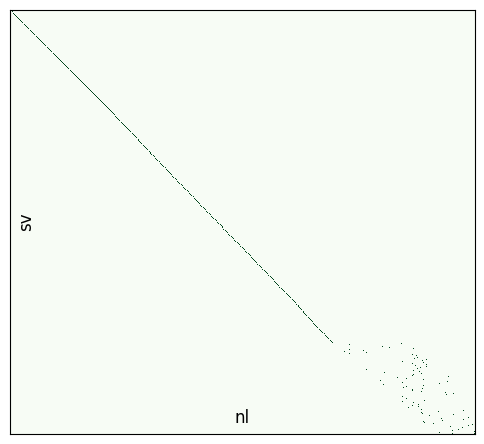

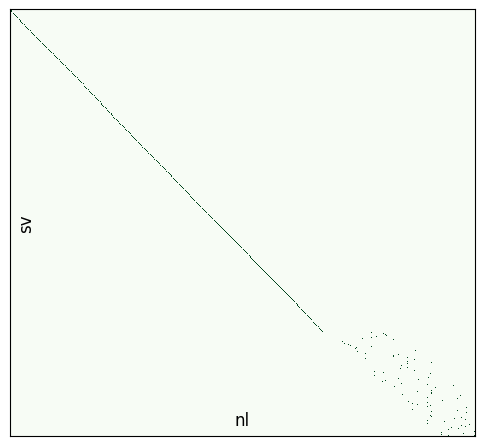

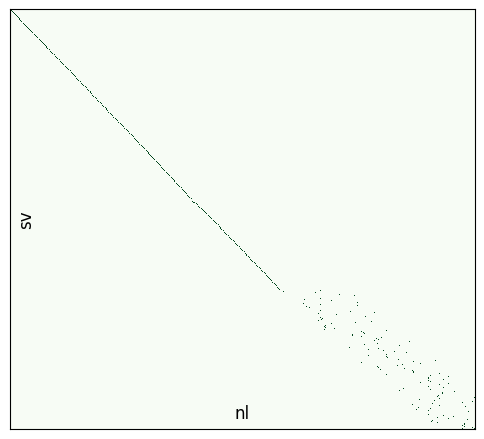

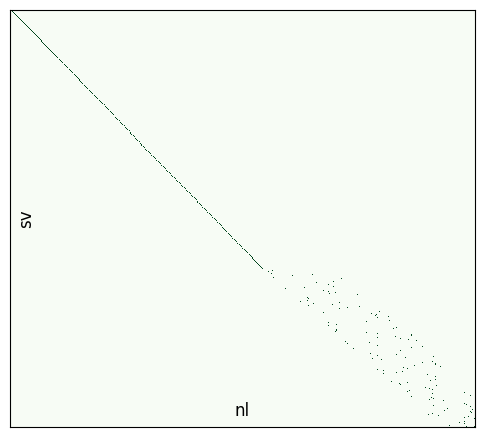

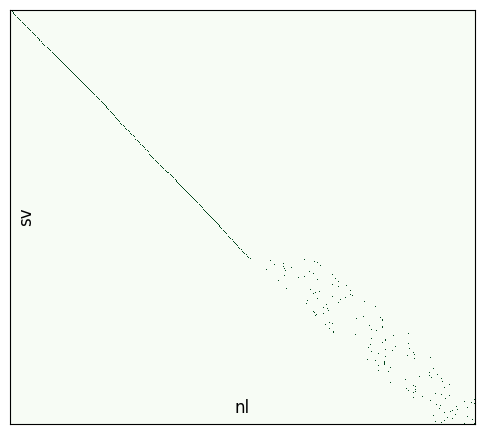

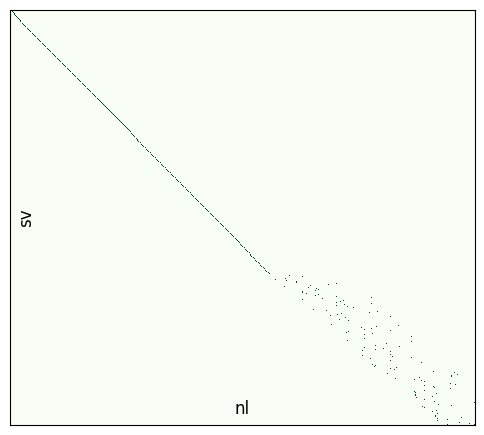

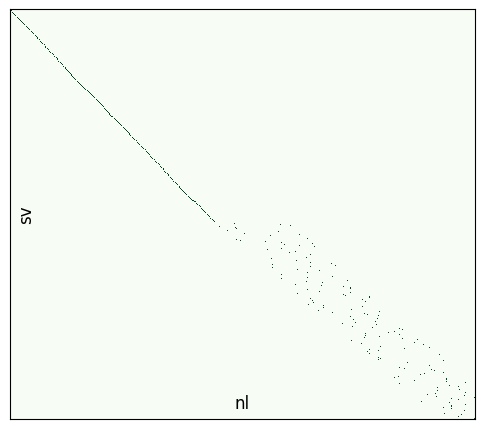

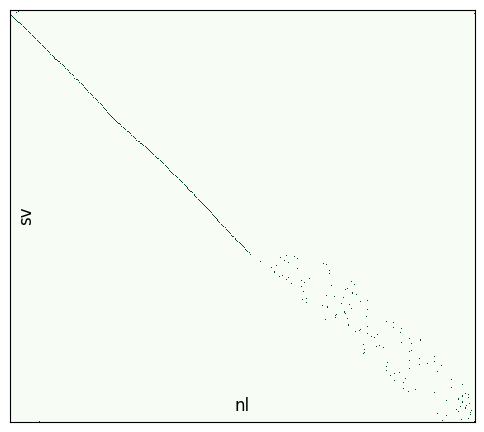

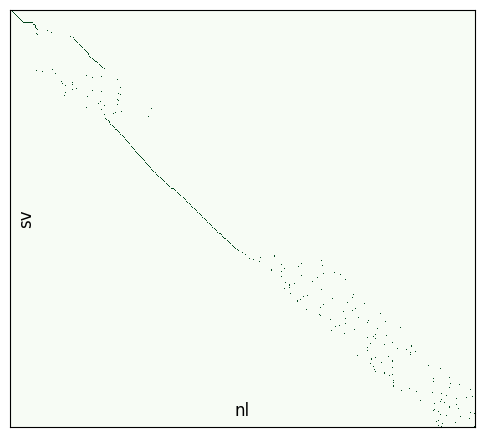

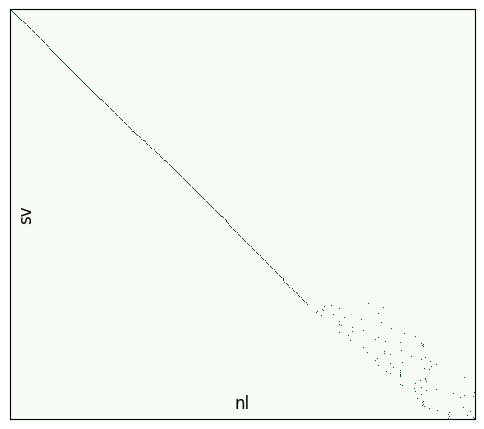

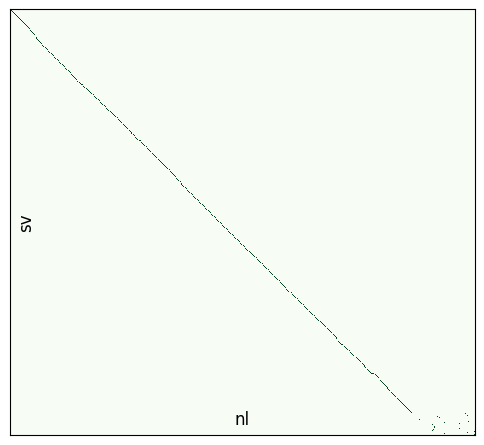

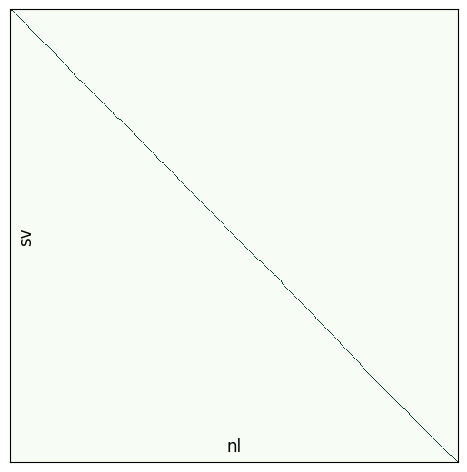

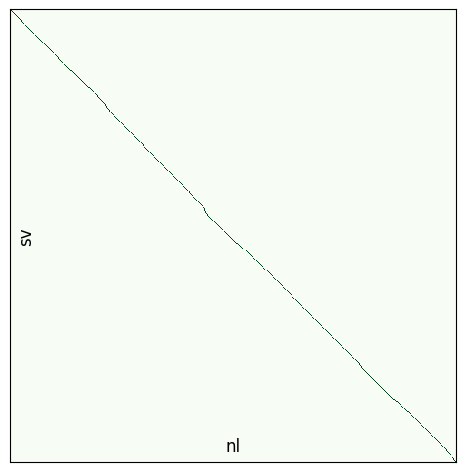

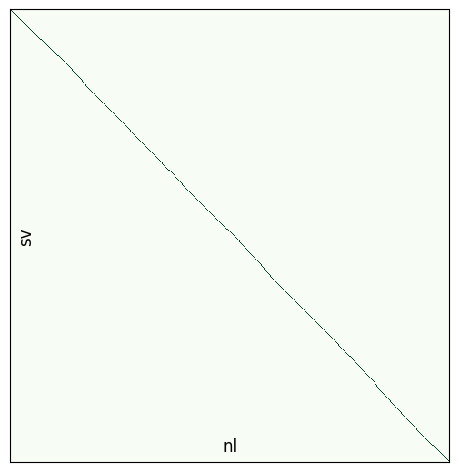

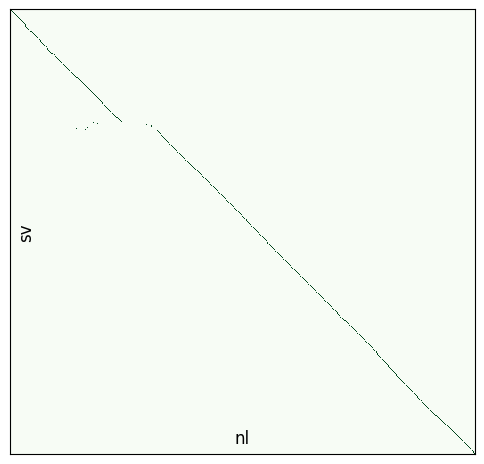

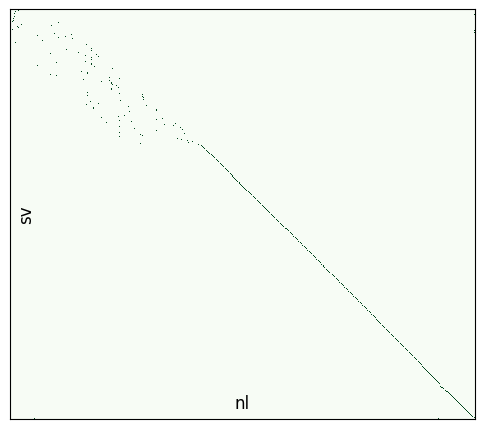

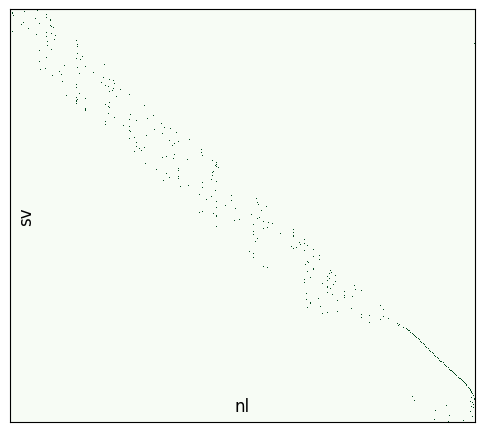

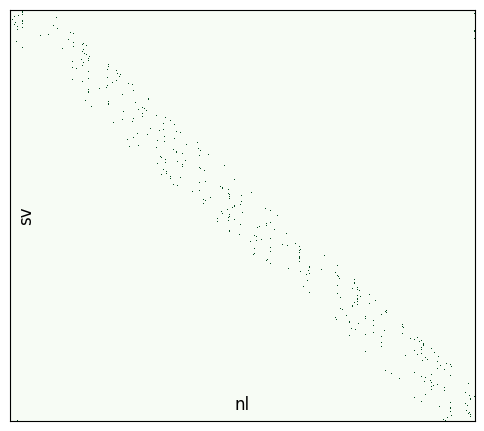

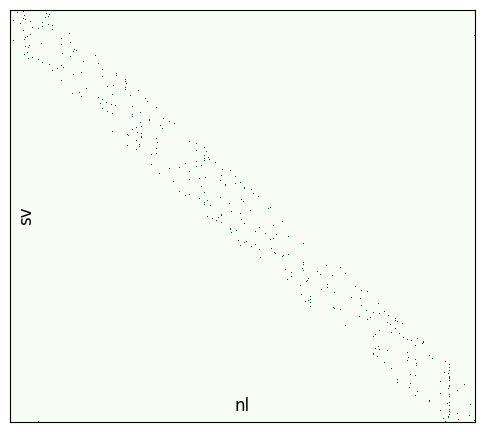

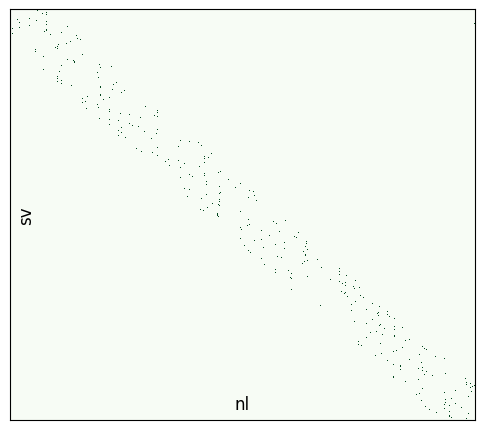

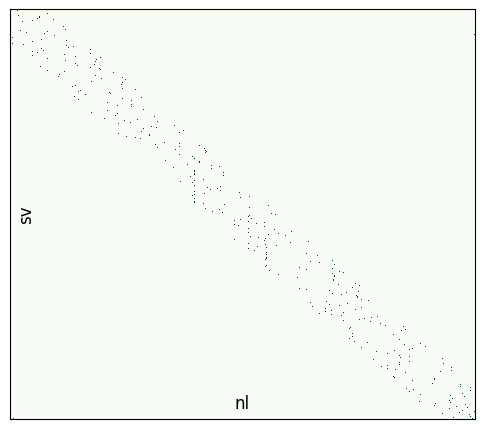

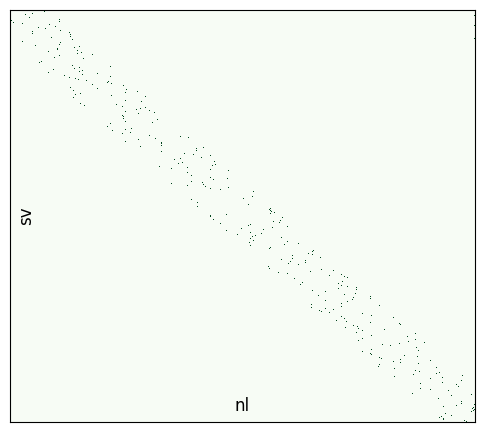

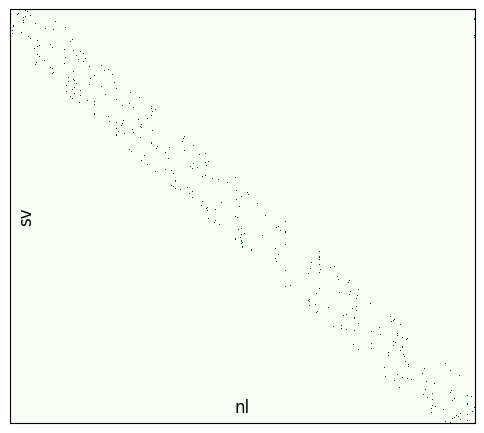

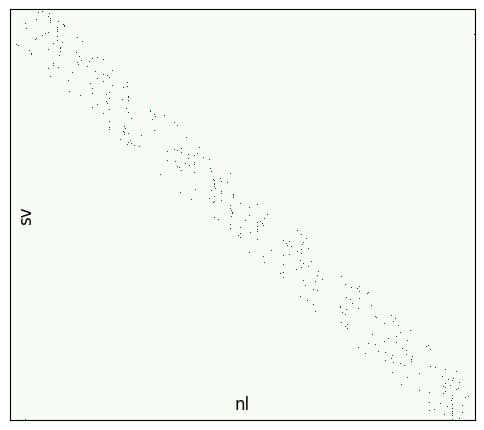

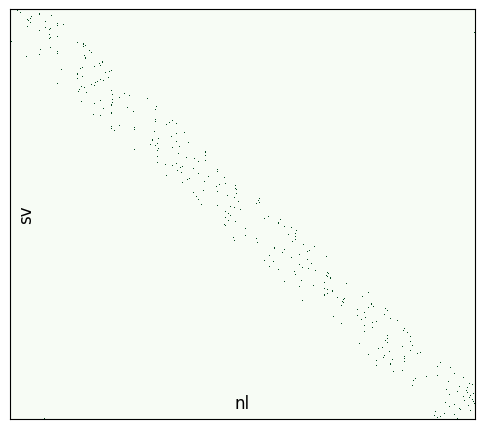

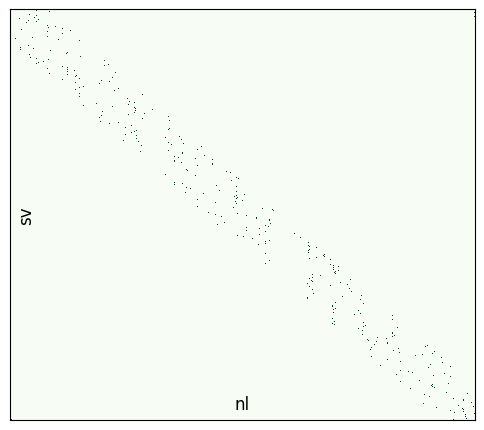

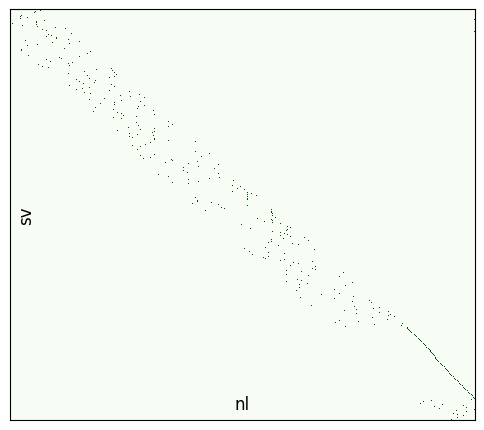

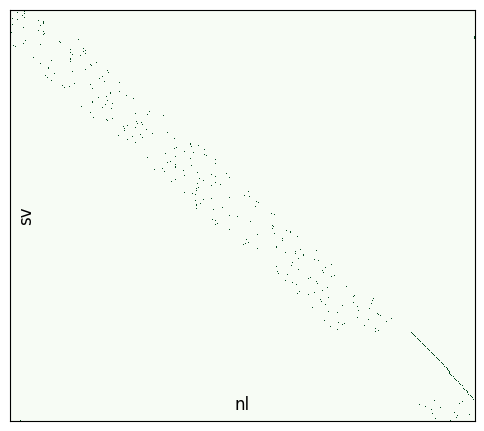

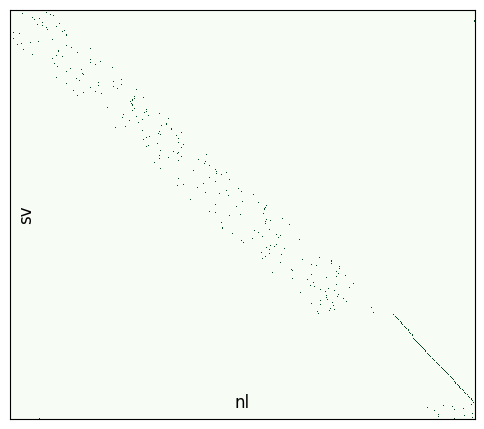

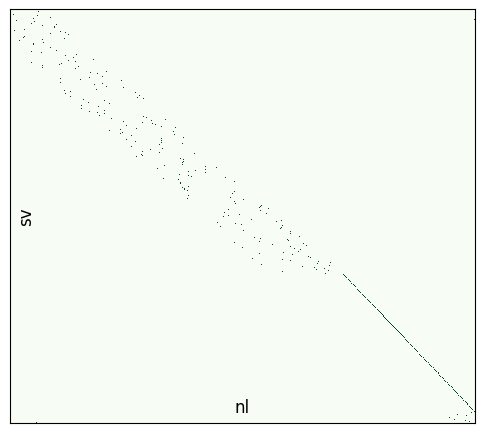

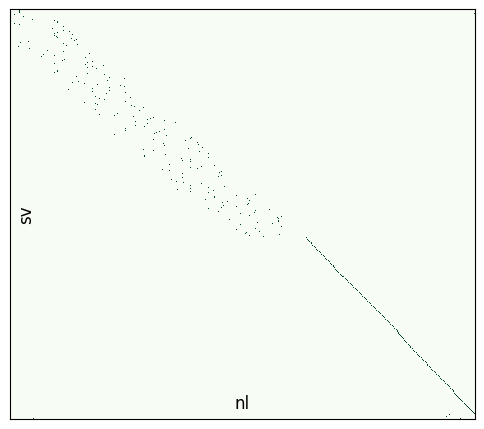

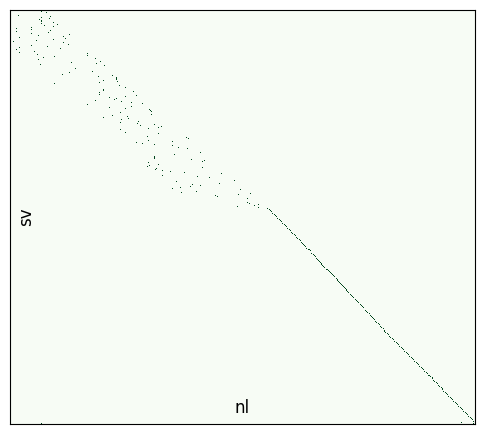

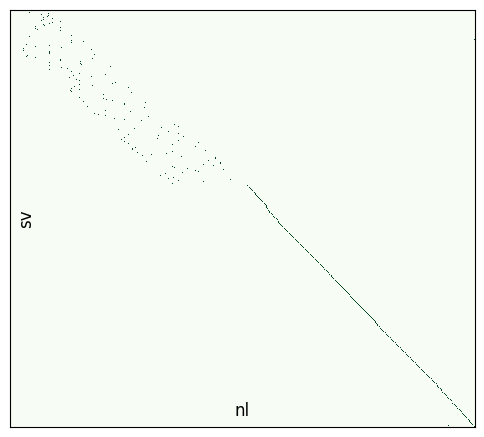

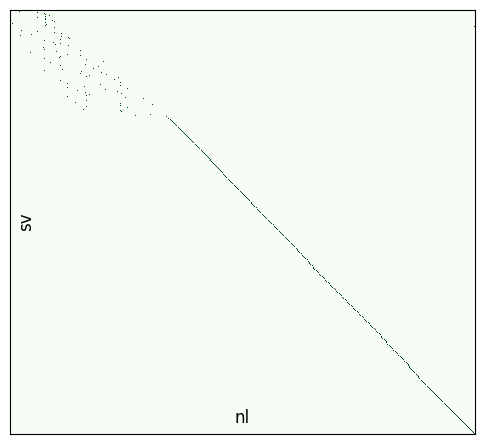

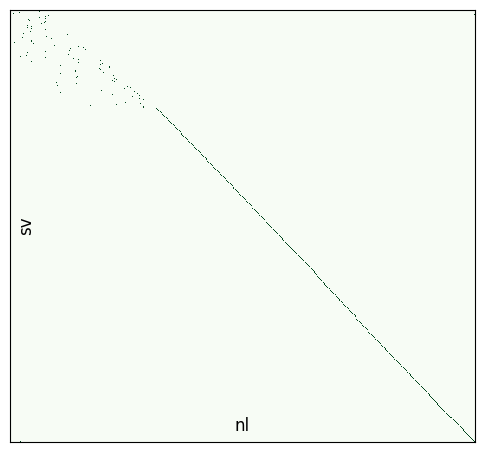

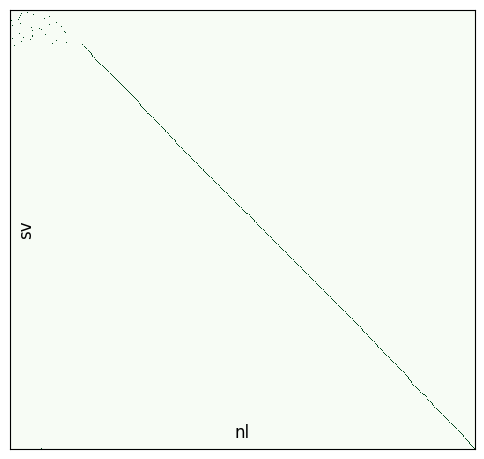

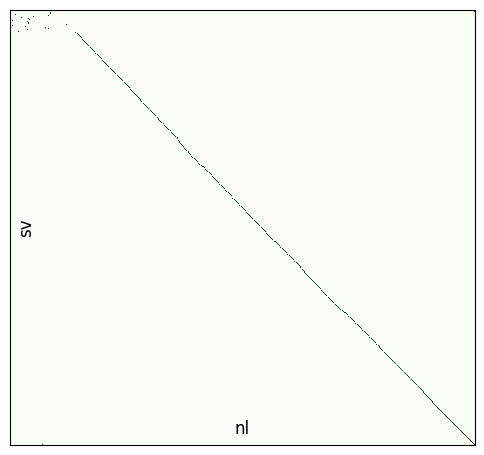

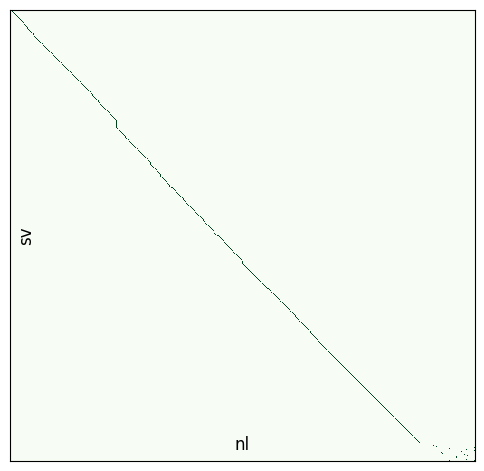

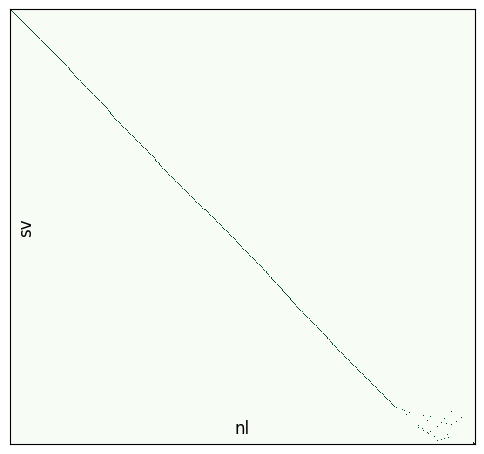

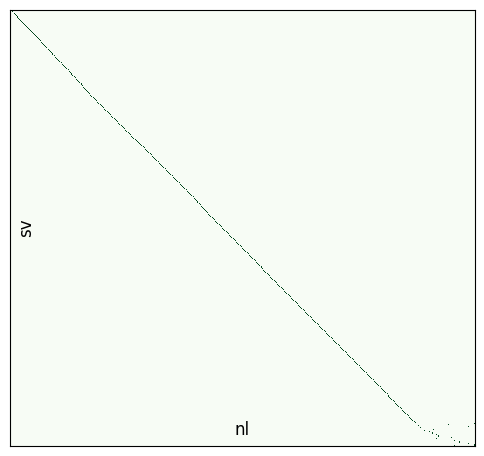

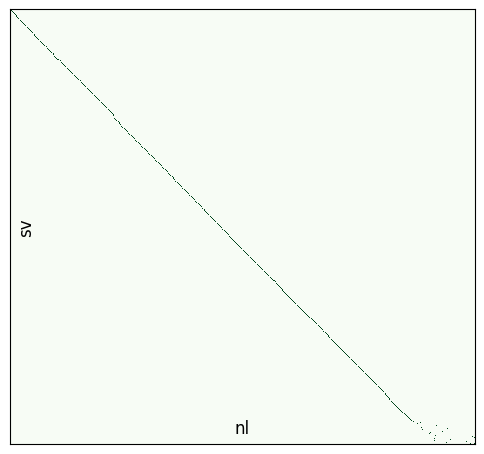

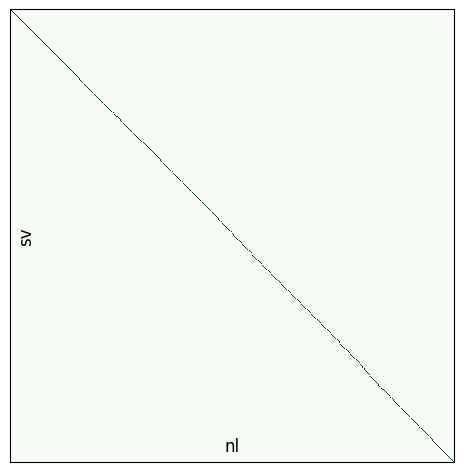

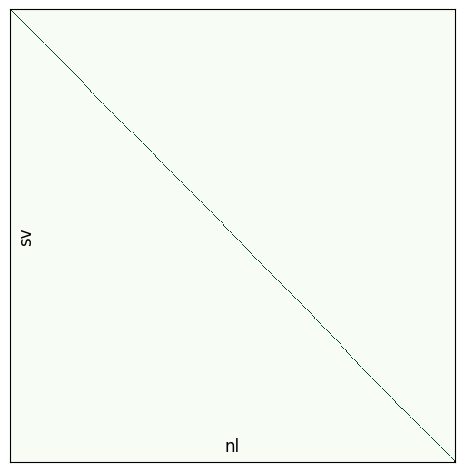

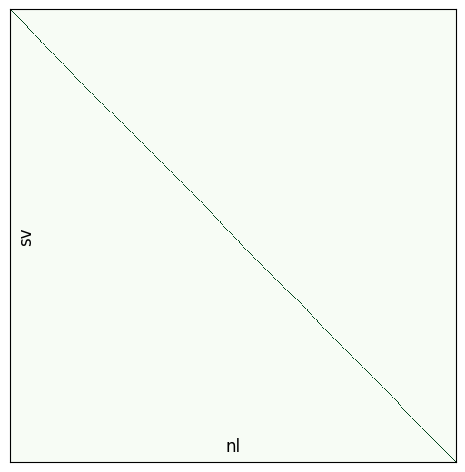

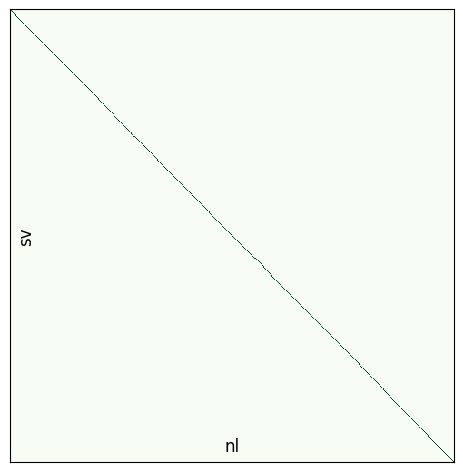

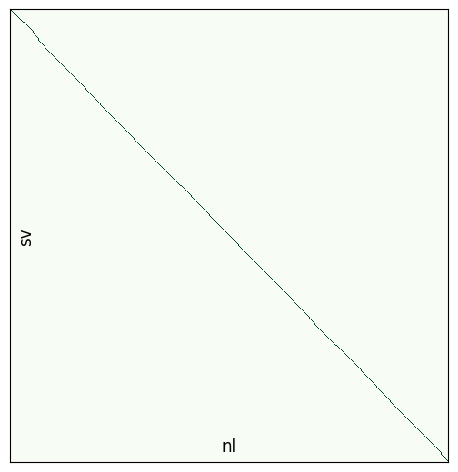

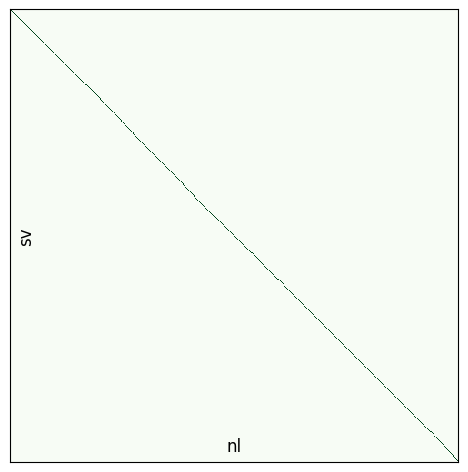

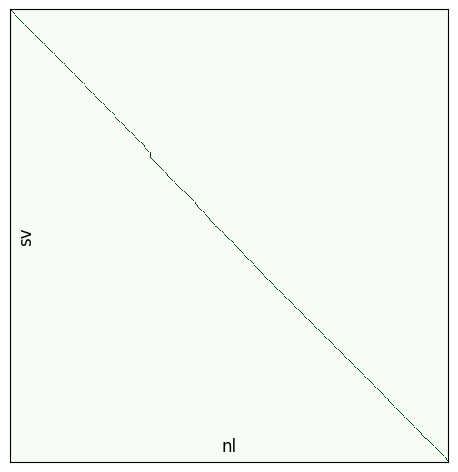

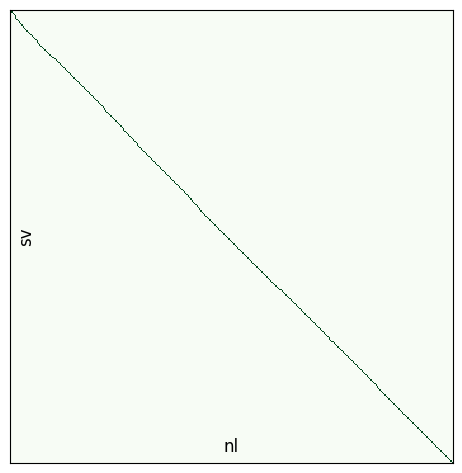

book.db


In [ ]:
steps = 3
batch_id = -1 

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    vis_helper.visualize_alignment_by_db(db_path, output_path="img_test1.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=500, size=(600,600), plt_show=True)

    if len(rest) == 0: break
print(db_path)

If the line is smoother compared to previously, it indicates that conflicts have been resolved successfully. This is a good sign. Now we are ready to make our parallel corpus and generate a .html file to display it. 

## Creating a parallel corpus

The alignment has finished and now store everything in a .html page. We will define our name of the parallel corpus, you can change this is you want: 

```
# Change
output_path = "result/my_book.html"

# To
output_path = "result/name_of_your_book.html"
```
We will also get the paragraphs and headers out of the alignment for better visualization


In [ ]:
output_path = "result/my_book.html"
paragraphs, delimeters, metas, sent_counter = reader.get_paragraphs(
    db_path, direction="to"
)




Here we define a style for our parallel book, this is purely for the visualization. 

In [ ]:
my_style = [
    '{"background": "#A2E4B8", "color": "black", "border-bottom": "0px solid red"}',
    '{"background": "#FFC1CC", "color": "black"}',
    '{"background": "#9BD3DD", "color": "black"}',
    '{"background": "#FFFCC9", "color": "black"}'
    ]

lang_ordered = ["from", "to"]
template = ["", "pastell_fill", "pastell_start"]

Here we create our parallel corpus, if you want you can change the template:

- if you don't choose a template all the text will be normal
- pastell_fill gives every sentence a different colour
- pastell_start gives a colour on all the first words of a sentence that slowly fades

In [ ]:
reader.create_book(
    lang_ordered=lang_ordered,
    paragraphs=paragraphs,
    delimeters=delimeters,
    metas=metas,
    sent_counter=sent_counter,
    output_path=output_path,
    template="pastel_fill",
    styles=[],
)

### Here we download the pdf

In [ ]:
from google.colab import files

files.download(output_path) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluation

### This part in only for the evaluation and works with a manual "gold" alignment
### You can ignore this, this is only useful if you want to do a evaluation of the automatic alignment algorithm


You can ignore this if you only want to make a parallel corpus

In [ ]:
index = helper.get_clear_flatten_doc_index(db_path)
# for i, ix in enumerate(index):
#   print(ix)
# print(len(index))
header_text = ""
for i, lang in enumerate(lang_ordered):
        header_text += f"{sent_counter[lang]} sent. [{lang}] "
        if i == 0:
            header_text += "• "
print(header_text)

29358 sent. [from] • 28890 sent. [to] 


In [ ]:
import re


gold_dir = 'gold'

gold_files = []
gold_alignments = []
for file in os.listdir(gold_dir):

  gold_file = os.path.join(gold_dir, file)
  print(gold_file)
  gold_alignments.append(evaluation.read_alignments(gold_file))
  gold_files.append(gold_file)

gold_alignments = gold_alignments[2]

test_alignments = []
for i in range(len(index)):
  ss = index[i][1]
  st = index[i][3]
  numbers_s = re.findall(r'\d+', ss)
  numbers_t = re.findall(r'\d+', st)

  for j in range(len(numbers_s)):
    # print(numbers_s)
    numbers_s[j] = int(numbers_s[j])
    
  for k in range(len(numbers_t)):
    # print(numbers_s)
    numbers_t[k] = int(numbers_t[k])

  t = (numbers_s, numbers_t)
  test_alignments.append(t) 

gold/007
gold/006
gold/004
gold/003
gold/005
gold/001
gold/002


In [ ]:
print(test_alignments[:5])
print(gold_alignments[:15])
print(gold_files[2])


[([1], [1]), ([2], [1]), ([3], [2]), ([4], [3]), ([5], [4])]
[([0], [0]), ([1], [1]), ([2], [2]), ([3], [3]), ([4, 7], [4, 5]), ([5], [13]), ([6], [14]), ([8], [6]), ([9], [7, 8, 9]), ([10, 11], [10]), ([12], [11]), ([13], [12, 15]), ([14], [16, 17]), ([15], [18]), ([16, 17], [19])]
gold/004


In [ ]:
import sys
import numpy as np

from ast import literal_eval
from collections import defaultdict

def score_multiple(gold_list, test_list, value_for_div_by_0=0.0):
    # accumulate counts for all gold/test files
    pcounts = np.array([0, 0, 0, 0], dtype=np.int32)
    rcounts = np.array([0, 0, 0, 0], dtype=np.int32)
    print("test")
    pcounts += precision(goldalign=gold_list, testalign=test_list)
    # recall is precision with no insertion/deletion and swap args
    test_no_del = [(x, y) for x, y in gold_list if len(x) and len(y)]
    gold_no_del = [(x, y) for x, y in gold_list if len(x) and len(y)]
    rcounts += precision(goldalign=test_no_del, testalign=gold_no_del)

    # Compute results
    # pcounts: tpstrict,fnstrict,tplax,fnlax
    # rcounts: tpstrict,fpstrict,tplax,fplax

    if pcounts[0] + pcounts[1] == 0:
        pstrict = value_for_div_by_0
    else:
        pstrict = pcounts[0] / float(pcounts[0] + pcounts[1])

    if pcounts[2] + pcounts[3] == 0:
        plax = value_for_div_by_0
    else:
        plax = pcounts[2] / float(pcounts[2] + pcounts[3])

    if rcounts[0] + rcounts[1] == 0:
        rstrict = value_for_div_by_0
    else:
        rstrict = rcounts[0] / float(rcounts[0] + rcounts[1])

    if rcounts[2] + rcounts[3] == 0:
        rlax = value_for_div_by_0
    else:
        rlax = rcounts[2] / float(rcounts[2] + rcounts[3])

    if (pstrict + rstrict) == 0:
        fstrict = value_for_div_by_0
    else:
        fstrict = 2 * (pstrict * rstrict) / (pstrict + rstrict)

    if (plax + rlax) == 0:
        flax = value_for_div_by_0
    else:
        flax = 2 * (plax * rlax) / (plax + rlax)

    result = dict(recall_strict=rstrict,
                  recall_lax=rlax,
                  precision_strict=pstrict,
                  precision_lax=plax,
                  f1_strict=fstrict,
                  f1_lax=flax)

    return result
    
def precision(goldalign, testalign):
    """
    Computes tpstrict, fpstrict, tplax, fplax for gold/test alignments
    """
    tpstrict = 0  # true positive strict counter
    tplax = 0     # true positive lax counter
    fpstrict = 0  # false positive strict counter
    fplax = 0     # false positive lax counter

    # convert to sets, remove alignments empty on both sides
    testalign = set([(tuple(x), tuple(y)) for x, y in testalign if len(x) or len(y)])
    goldalign = set([(tuple(x), tuple(y)) for x, y in goldalign if len(x) or len(y)])

    # mappings from source test sentence idxs to
    #    target gold sentence idxs for which the source test sentence 
    #    was found in corresponding source gold alignment
    src_id_to_gold_tgt_ids = defaultdict(set)
    for gold_src, gold_tgt in goldalign:
        for gold_src_id in gold_src:
            for gold_tgt_id in gold_tgt:
                src_id_to_gold_tgt_ids[gold_src_id].add(gold_tgt_id)

    for (test_src, test_target) in testalign:
        if (test_src, test_target) == ((), ()):
            continue
        if (test_src, test_target) in goldalign:
            # strict match
            tpstrict += 1
            tplax += 1
        else:
            # For anything with partial gold/test overlap on the source,
            #   see if there is also partial overlap on the gold/test target
            # If so, its a lax match
            target_ids = set()
            for src_test_id in test_src:
                for tgt_id in src_id_to_gold_tgt_ids[src_test_id]:
                    target_ids.add(tgt_id)
            if set(test_target).intersection(target_ids):
                fpstrict += 1
                tplax += 1
            else:
                fpstrict += 1
                fplax += 1

    return np.array([tpstrict, fpstrict, tplax, fplax], dtype=np.int32)

def log_final_scores(res):
    print(' ---------------------------------', file=sys.stderr)
    print('|             |  Strict |    Lax  |', file=sys.stderr)
    print('| Precision   |   {precision_strict:.3f} |   {precision_lax:.3f} |'.format(**res), file=sys.stderr)
    print('| Recall      |   {recall_strict:.3f} |   {recall_lax:.3f} |'.format(**res), file=sys.stderr)
    print('| F1          |   {f1_strict:.3f} |   {f1_lax:.3f} |'.format(**res), file=sys.stderr)
    print(' ---------------------------------', file=sys.stderr)
    
def read_alignments(file):
    alignments = []
    with open(file, 'rt', encoding="utf-8") as f:
        for line in f:
            fields = [x.strip() for x in line.split(':') if len(x.strip())]
            if len(fields) < 2:
                raise Exception('Got line "%s", which does not have at least two ":" separated fields' % line.strip())
            try:
                src = literal_eval(fields[0])
                tgt = literal_eval(fields[1])
            except:
                raise Exception('Failed to parse line "%s"' % line.strip())
            alignments.append((src, tgt))
    return alignments


scores = score_multiple(gold_list=gold_alignments, test_list=test_alignments)
log_final_scores(scores)

test


 ---------------------------------
|             |  Strict |    Lax  |
| Precision   |   0.000 |   0.000 |
| Recall      |   1.000 |   1.000 |
| F1          |   0.000 |   0.000 |
 ---------------------------------
